BT4014 MMA Project

In [1]:
import pandas as pd
import datetime

In [2]:
# Using the basic stats as outlined in the dataset description (except urls)
masterMLpublic = pd.read_csv("/kaggle/input/mma-differentials-and-elo/masterMLpublic.csv",
                            usecols = [
                                "date", "result", "fighter", "opponent", "division",
                                "stance", "dob", "method", "total_comp_time", "round", 
                                "time", "referee", "time_format", "reach", "height",
                                "age", "knockdowns", "sub_attempts", "reversals", "control",
                                "takedowns_landed", "takedowns_attempts",
                                "sig_strikes_landed", "sig_strikes_attempts",
                                "total_strikes_landed", "total_strikes_attempts",
                                "head_strikes_landed", "head_strikes_attempts",
                                "body_strikes_landed", "body_strikes_attempts",
                                "leg_strikes_landed", "leg_strikes_attempts",
                                "distance_strikes_landed", "distance_strikes_attempts",
                                "clinch_strikes_landed", "clinch_strikes_attempts",
                                "ground_strikes_landed", "ground_strikes_attempts",
                                "KO_losses", "days_since_last_comp", "lose_streak",
                                "win_streak", "win_loss_ratio", "total_comp_time", "stamina",
                                "num_fights", "trueskill", "elo"
                            ])
# Convert the date columns from object into datetime
masterMLpublic["date"] = pd.to_datetime(masterMLpublic["date"]).dt.date
masterMLpublic["dob"] = pd.to_datetime(masterMLpublic["dob"]).dt.date
masterMLpublic

,date,result,fighter,opponent,stance,dob,division,method,round,time,...,ground_strikes_attempts,num_fights,win_streak,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill
0,1994-03-11,0,sean daugherty,scott morris,NaN,1975-12-04,Open Weight,SUB,1,0:20,...,0,1.0,0,1,0.000000,0,20.0,0.000000,1147.756618,20.794729
1,1994-03-11,1,scott morris,sean daugherty,Orthodox,NaT,Open Weight,SUB,1,0:20,...,0,1.0,1,0,1.000000,0,20.0,0.000000,1252.243382,29.205271
2,1994-03-11,0,ray wizard,patrick smith,NaN,NaT,Open Weight,SUB,1,0:58,...,0,1.0,0,1,0.000000,0,58.0,0.000000,1147.164966,20.794729
3,1994-03-11,1,patrick smith,ray wizard,Orthodox,1963-08-28,Open Weight,SUB,1,0:58,...,0,1.0,1,0,1.000000,0,58.0,0.000000,1249.442138,29.205271
4,1994-03-11,0,david levicki,johnny rhodes,NaN,NaT,Open Weight,KO/TKO,1,12:13,...,1,1.0,0,1,0.000000,1,733.0,0.000000,1141.838344,20.794729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,2023-04-15,1,azamat murzakanov,dustin jacoby,Southpaw,1989-04-12,Light Heavyweight,U-DEC,3,5:00,...,0,3.0,3,0,1.000000,0,2222.0,1.000000,1341.922237,35.760448
14126,2023-04-15,0,billy quarantillo,edson barboza,Orthodox,1988-12-08,Featherweight,KO/TKO,1,2:37,...,0,8.0,0,1,0.625000,1,5352.0,0.600000,1264.744398,31.425332
14127,2023-04-15,1,edson barboza,billy quarantillo,Orthodox,1986-01-21,Featherweight,KO/TKO,1,2:37,...,1,28.0,1,0,0.607143,4,18947.0,0.631579,1350.043973,34.795952
14128,2023-04-15,0,arnold allen,max holloway,Southpaw,1994-01-22,Featherweight,U-DEC,5,5:00,...,0,11.0,0,1,0.909091,0,8823.0,0.888889,1489.695647,39.967508


In [3]:
masterMLpublic.dtypes

# Need to figure out what to do with the objects. Contextual bandit -> linear function (i.e., needs some number)
# 1. Label encode?
# 2. Ignore?

# Objects are:
# date        -> ignore
# fighter     -> ignore
# opponent    -> ignore
# stance      -> label encode
# dob         -> ignore (use age instead)
# division    -> ignore (since we only compare within a division)
# method      -> label encode
# time        -> convert to seconds
# referee     -> ignore
# time_format -> label encode

date                          object
result                         int64
fighter                       object
opponent                      object
stance                        object
dob                           object
division                      object
method                        object
round                          int64
time                          object
referee                       object
time_format                   object
reach                        float64
age                          float64
height                       float64
knockdowns                     int64
days_since_last_comp         float64
sub_attempts                   int64
reversals                      int64
control                        int64
takedowns_landed               int64
takedowns_attempts             int64
sig_strikes_landed             int64
sig_strikes_attempts           int64
total_strikes_landed           int64
total_strikes_attempts         int64
head_strikes_landed            int64
h

In [4]:
masterMLpublic.isna().sum()             # count of na
# masterMLpublic.isna().mean() * 100    # percentage of na

# Need to figure out what to do with null values.

# If {variable} is null -> {action}:
# stance  -> remove
# dob     -> remove
# referee -> ignore
# reach   -> impute with division average
# age     -> remove
# height  -> remove

date                            0
result                          0
fighter                         0
opponent                        0
stance                         97
dob                           235
division                        0
method                          0
round                           0
time                            0
referee                        64
time_format                     0
reach                        1282
age                           235
height                         14
knockdowns                      0
days_since_last_comp            0
sub_attempts                    0
reversals                       0
control                         0
takedowns_landed                0
takedowns_attempts              0
sig_strikes_landed              0
sig_strikes_attempts            0
total_strikes_landed            0
total_strikes_attempts          0
head_strikes_landed             0
head_strikes_attempts           0
body_strikes_landed             0
body_strikes_a

In [5]:
masterMLpublic["days_since_last_comp"].value_counts()
# Need to impute value for erroneous days_since_last_comp value (likely caused when fighters have no prior fights)
# Can replace erroneous values with age

days_since_last_comp
216.108044     2357
133.000000      403
140.000000      376
126.000000      376
147.000000      352
               ... 
282.000000        1
2422.000000       1
247.000000        1
1806.000000       1
1004.000000       1
Name: count, Length: 701, dtype: int64

In [6]:
# for col in masterMLpublic.columns:
#     print(col)

In [7]:
# masterdataframe = pd.read_csv("/kaggle/input/mma-differentials-and-elo/masterdataframe.csv")
# masterdataframe

In [8]:
# for col in masterdataframe.columns:
#     print(col)

In [9]:
masterMLpublic["division"].value_counts()
# Can focus on Lightweight division first (since fighters only fight within their division)

division
Lightweight              2470
Welterweight             2410
Middleweight             1898
Featherweight            1340
Heavyweight              1318
Light Heavyweight        1284
Bantamweight             1198
Flyweight                 582
Women's Strawweight       516
Women's Flyweight         380
Women's Bantamweight      362
Open Weight               204
Catch Weight              114
Women's Featherweight      52
Super Heavyweight           2
Name: count, dtype: int64

In [10]:
lightweight = masterMLpublic[masterMLpublic["division"] == "Lightweight"]
lightweight

,date,result,fighter,opponent,stance,dob,division,method,round,time,...,ground_strikes_attempts,num_fights,win_streak,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill
198,1997-02-07,0,rainy martinez,jerry bohlander,Orthodox,NaT,Lightweight,SUB,1,1:24,...,0,1.0,0,1,0.000000,0,84.0,0.000000,1155.936792,21.246039
199,1997-02-07,1,jerry bohlander,rainy martinez,Orthodox,1974-02-12,Lightweight,SUB,1,1:24,...,0,4.0,2,0,0.750000,1,1858.0,0.000000,1292.341803,29.965180
200,1997-02-07,0,wallid ismail,yoshiki takahashi,Orthodox,1968-02-23,Lightweight,U-DEC,2,3:00,...,0,1.0,0,1,0.000000,0,900.0,0.000000,1147.756618,20.794729
201,1997-02-07,1,yoshiki takahashi,wallid ismail,Southpaw,1969-03-13,Lightweight,U-DEC,2,3:00,...,10,1.0,1,0,1.000000,0,900.0,0.000000,1252.243382,29.205271
206,1997-02-07,0,nick sanzo,jerry bohlander,NaN,NaT,Lightweight,SUB,1,0:39,...,0,1.0,0,1,0.000000,0,39.0,0.000000,1162.881928,21.710767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14055,2023-03-18,1,justin gaethje,rafael fiziev,Orthodox,1988-11-14,Lightweight,M-DEC,3,5:00,...,0,11.0,1,0,0.636364,2,6670.0,0.600000,1491.524082,38.809578
14108,2023-04-15,0,lando vannata,daniel zellhuber,Orthodox,1992-03-14,Lightweight,U-DEC,3,5:00,...,2,13.0,0,2,0.307692,0,9089.0,0.222222,1148.578353,26.265970
14109,2023-04-15,1,daniel zellhuber,lando vannata,Switch,1999-07-07,Lightweight,U-DEC,3,5:00,...,51,2.0,1,0,0.500000,0,1800.0,0.500000,1200.212327,26.476804
14118,2023-04-15,0,clay guida,rafa garcia,Orthodox,1981-12-08,Lightweight,U-DEC,3,5:00,...,0,35.0,0,1,0.514286,2,24276.0,0.521739,1178.957220,31.316986


In [11]:
lightweight.iloc[0]

date                              1997-02-07
result                                     0
fighter                       rainy martinez
opponent                     jerry bohlander
stance                              Orthodox
dob                                      NaT
division                         Lightweight
method                                   SUB
round                                      1
time                                    1:24
referee                        John McCarthy
time_format                             12-3
reach                                    NaN
age                                      NaN
height                                  72.0
knockdowns                                 0
days_since_last_comp              216.108044
sub_attempts                               0
reversals                                  0
control                                    0
takedowns_landed                           0
takedowns_attempts                         0
sig_strike

In [12]:
lightweight["fighter"].nunique()

524

In [13]:
date_threshold = datetime.date(2021, 1, 1)
early_lightweight = lightweight[lightweight["date"] < date_threshold]
late_lightweight = lightweight[lightweight["date"] >= date_threshold]

In [14]:
early_lightweight

,date,result,fighter,opponent,stance,dob,division,method,round,time,...,ground_strikes_attempts,num_fights,win_streak,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill
198,1997-02-07,0,rainy martinez,jerry bohlander,Orthodox,NaT,Lightweight,SUB,1,1:24,...,0,1.0,0,1,0.000000,0,84.0,0.000,1155.936792,21.246039
199,1997-02-07,1,jerry bohlander,rainy martinez,Orthodox,1974-02-12,Lightweight,SUB,1,1:24,...,0,4.0,2,0,0.750000,1,1858.0,0.000,1292.341803,29.965180
200,1997-02-07,0,wallid ismail,yoshiki takahashi,Orthodox,1968-02-23,Lightweight,U-DEC,2,3:00,...,0,1.0,0,1,0.000000,0,900.0,0.000,1147.756618,20.794729
201,1997-02-07,1,yoshiki takahashi,wallid ismail,Southpaw,1969-03-13,Lightweight,U-DEC,2,3:00,...,10,1.0,1,0,1.000000,0,900.0,0.000,1252.243382,29.205271
206,1997-02-07,0,nick sanzo,jerry bohlander,NaN,NaT,Lightweight,SUB,1,0:39,...,0,1.0,0,1,0.000000,0,39.0,0.000,1162.881928,21.710767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,2020-12-05,1,gabriel benitez,justin jaynes,Southpaw,1988-06-15,Lightweight,KO/TKO,1,4:06,...,5,10.0,1,0,0.600000,2,5342.0,0.600,1273.013267,29.423404
11754,2020-12-12,0,renato moicano,rafael fiziev,Orthodox,1989-05-21,Lightweight,KO/TKO,1,4:05,...,0,10.0,0,1,0.600000,3,4935.0,0.750,1240.856956,34.152111
11755,2020-12-12,1,rafael fiziev,renato moicano,Switch,1993-03-05,Lightweight,KO/TKO,1,4:05,...,1,4.0,3,0,0.750000,1,2131.0,1.000,1300.963413,33.694983
11764,2020-12-12,0,tony ferguson,charles oliveira,Orthodox,1984-02-12,Lightweight,U-DEC,3,5:00,...,3,18.0,0,2,0.833333,1,11985.0,0.625,1506.243446,38.479987


In [15]:
late_lightweight

,date,result,fighter,opponent,stance,dob,division,method,round,time,...,ground_strikes_attempts,num_fights,win_streak,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill
11816,2021-01-20,0,mason jones,mike davis,Orthodox,1995-04-26,Lightweight,U-DEC,3,5:00,...,7,1.0,0,1,0.000000,0,900.0,-0.050000,1165.782229,20.474403
11817,2021-01-20,1,mike davis,mason jones,Orthodox,1992-10-07,Lightweight,U-DEC,3,5:00,...,4,3.0,2,0,0.666667,0,2340.0,1.000000,1246.438167,27.871592
11850,2021-01-23,0,matt frevola,arman tsarukyan,Orthodox,1990-06-11,Lightweight,U-DEC,3,5:00,...,0,5.0,0,1,0.400000,1,3660.0,0.500000,1186.406302,29.233458
11851,2021-01-23,1,arman tsarukyan,matt frevola,Orthodox,1996-10-11,Lightweight,U-DEC,3,5:00,...,9,4.0,3,0,0.750000,0,3600.0,0.750000,1343.102444,35.430054
11858,2021-01-23,0,dan hooker,michael chandler,Switch,1990-02-13,Lightweight,KO/TKO,1,2:30,...,0,16.0,0,2,0.625000,2,9945.0,0.375000,1338.823540,33.640663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14055,2023-03-18,1,justin gaethje,rafael fiziev,Orthodox,1988-11-14,Lightweight,M-DEC,3,5:00,...,0,11.0,1,0,0.636364,2,6670.0,0.600000,1491.524082,38.809578
14108,2023-04-15,0,lando vannata,daniel zellhuber,Orthodox,1992-03-14,Lightweight,U-DEC,3,5:00,...,2,13.0,0,2,0.307692,0,9089.0,0.222222,1148.578353,26.265970
14109,2023-04-15,1,daniel zellhuber,lando vannata,Switch,1999-07-07,Lightweight,U-DEC,3,5:00,...,51,2.0,1,0,0.500000,0,1800.0,0.500000,1200.212327,26.476804
14118,2023-04-15,0,clay guida,rafa garcia,Orthodox,1981-12-08,Lightweight,U-DEC,3,5:00,...,0,35.0,0,1,0.514286,2,24276.0,0.521739,1178.957220,31.316986


Data Cleaning

In [16]:
cleaned_lightweight = lightweight

#null values
average_reach_lightweight = cleaned_lightweight[cleaned_lightweight['division'] == 'Lightweight']['reach'].mean()
cleaned_lightweight['reach'].fillna(average_reach_lightweight, inplace=True)

cleaned_lightweight.dropna(subset=['stance', 'age', 'height'], inplace=True)

#replace
def time_to_seconds(time_str):
    if pd.isnull(time_str):
        return np.nan
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

specific_value = 216.1080438291005
cleaned_lightweight.loc[cleaned_lightweight['days_since_last_comp'] == specific_value, 'days_since_last_comp'] = cleaned_lightweight['age']


cleaned_lightweight['time_seconds'] = cleaned_lightweight['time'].apply(time_to_seconds)

#remove columns
columns_to_ignore = ['date', 'fighter', 'opponent', 'dob', 'division', 'referee', 'time', 'time_format']
cleaned_lightweight.drop(columns=columns_to_ignore, inplace=True)
lightweight = cleaned_lightweight


/tmp/ipykernel_19/606193952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_lightweight['reach'].fillna(average_reach_lightweight, inplace=True)
/tmp/ipykernel_19/606193952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_lightweight.dropna(subset=['stance', 'age', 'height'], inplace=True)
/tmp/ipykernel_19/606193952.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [17]:
#label encoding 
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encode 'stance' column
if 'stance' in cleaned_lightweight.columns:
    cleaned_lightweight['stance_encoded'] = label_encoder.fit_transform(cleaned_lightweight['stance'])

# Label encode 'method' column
if 'method' in cleaned_lightweight.columns:
    cleaned_lightweight['method_encoded'] = label_encoder.fit_transform(cleaned_lightweight['method'])

# Drop the original 'stance' and 'method' columns
cleaned_lightweight.drop(columns=['stance', 'method'], inplace=True)


/tmp/ipykernel_19/2437616765.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_lightweight['stance_encoded'] = label_encoder.fit_transform(cleaned_lightweight['stance'])
/tmp/ipykernel_19/2437616765.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_lightweight['method_encoded'] = label_encoder.fit_transform(cleaned_lightweight['method'])
/tmp/ipykernel_19/2437616765.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

In [18]:
cleaned_lightweight

,result,round,reach,age,height,knockdowns,days_since_last_comp,sub_attempts,reversals,control,...,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill,time_seconds,stance_encoded,method_encoded
199,1,1,71.462766,8396.0,71.0,0,140.0,1,0,0,...,0,0.750000,1,1858.0,0.000000,1292.341803,29.965180,84,0,5
200,0,2,71.462766,10577.0,67.0,0,10577.0,0,0,0,...,1,0.000000,0,900.0,0.000000,1147.756618,20.794729,180,0,6
201,1,2,71.462766,10193.0,71.0,0,10193.0,0,0,0,...,0,1.000000,0,900.0,0.000000,1252.243382,29.205271,180,1,6
207,1,1,71.462766,8396.0,71.0,0,0.0,1,0,0,...,0,0.800000,1,1897.0,0.000000,1329.459875,31.301881,39,0,5
213,1,1,74.000000,8163.0,75.0,0,8163.0,0,0,0,...,0,1.000000,0,31.0,0.000000,1263.165486,29.205271,31,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14055,1,3,70.000000,12542.0,71.0,0,315.0,0,0,5,...,0,0.636364,2,6670.0,0.600000,1491.524082,38.809578,300,0,3
14108,0,3,71.000000,11354.0,69.0,0,357.0,0,0,6,...,2,0.307692,0,9089.0,0.222222,1148.578353,26.265970,300,0,6
14109,1,3,77.000000,8683.0,73.0,1,210.0,0,0,104,...,0,0.500000,0,1800.0,0.500000,1200.212327,26.476804,300,2,6
14118,0,3,70.000000,15103.0,67.0,0,133.0,0,0,0,...,1,0.514286,2,24276.0,0.521739,1178.957220,31.316986,300,0,6


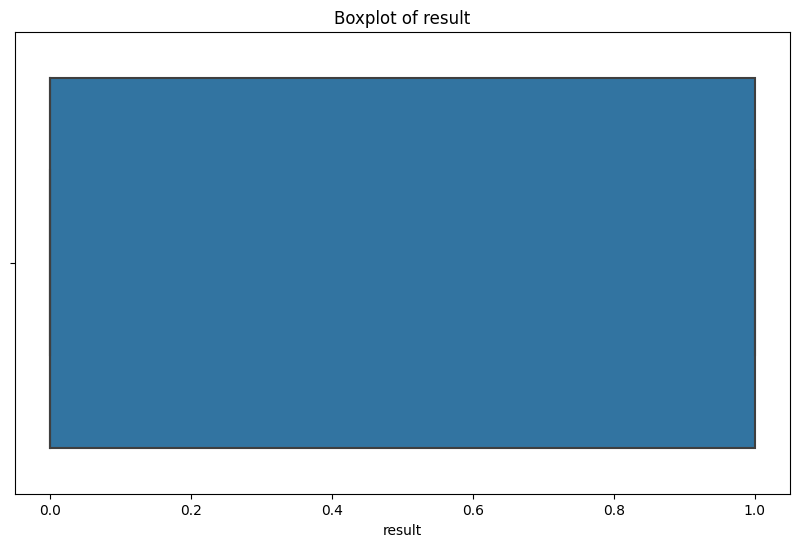

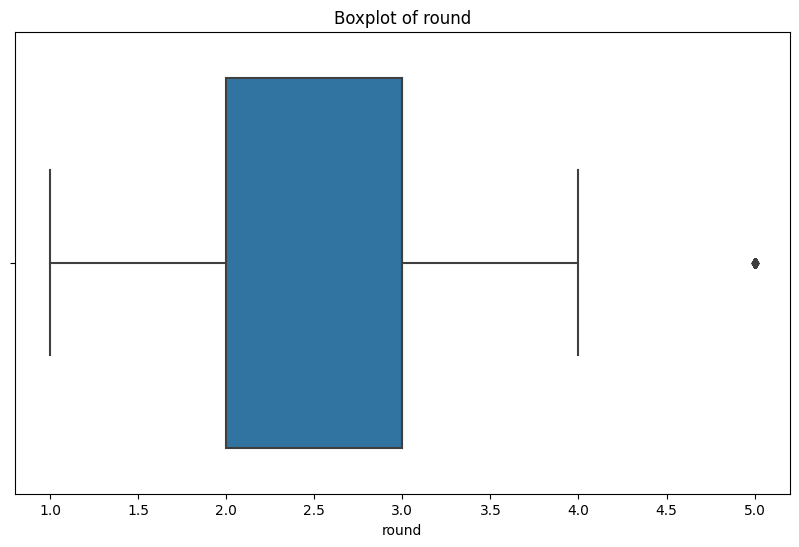

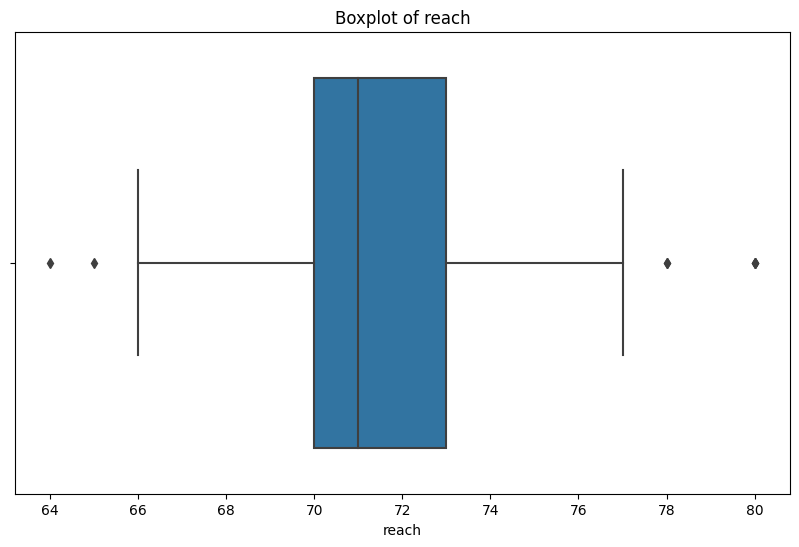

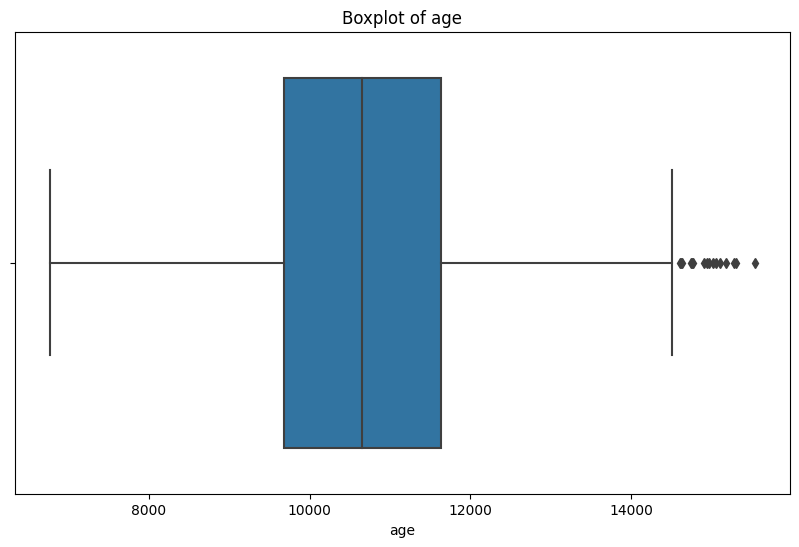

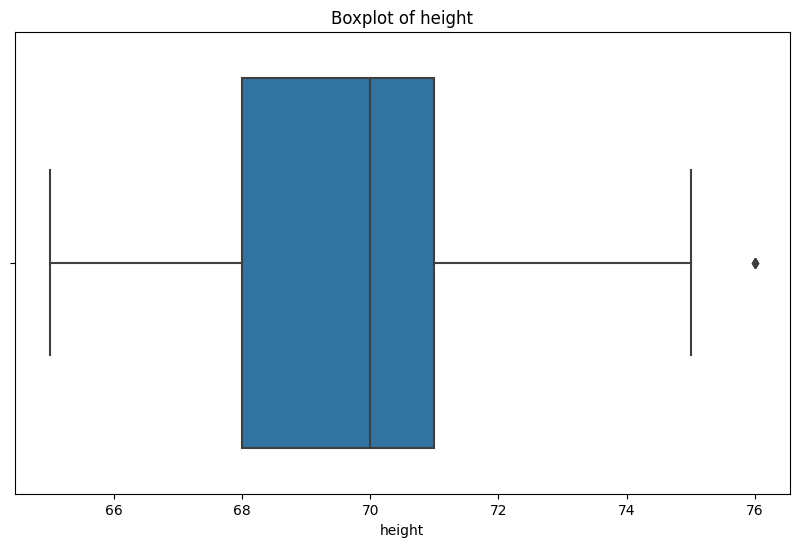

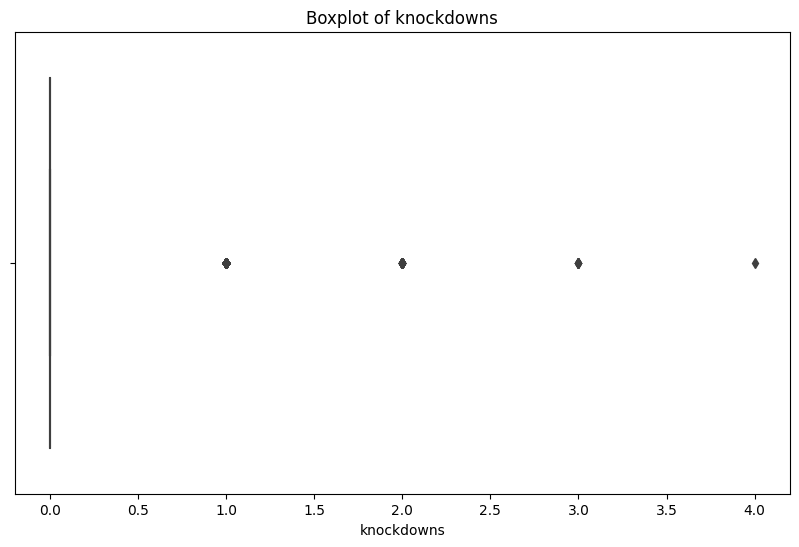

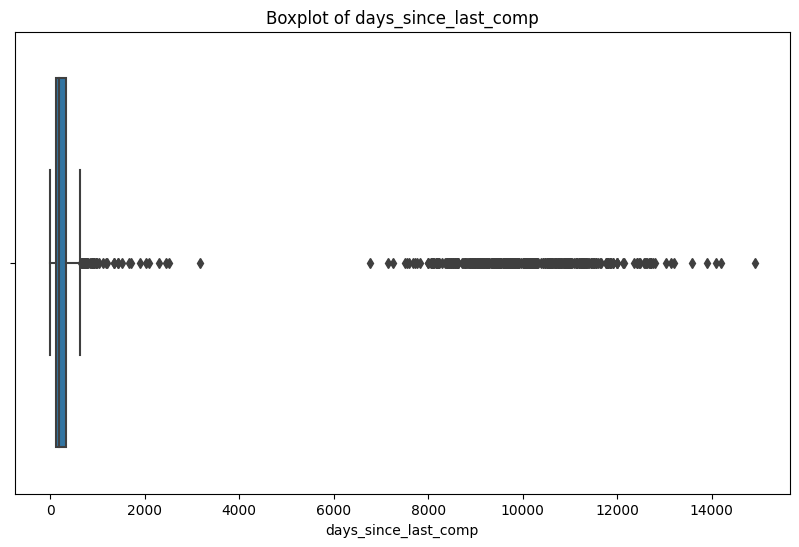

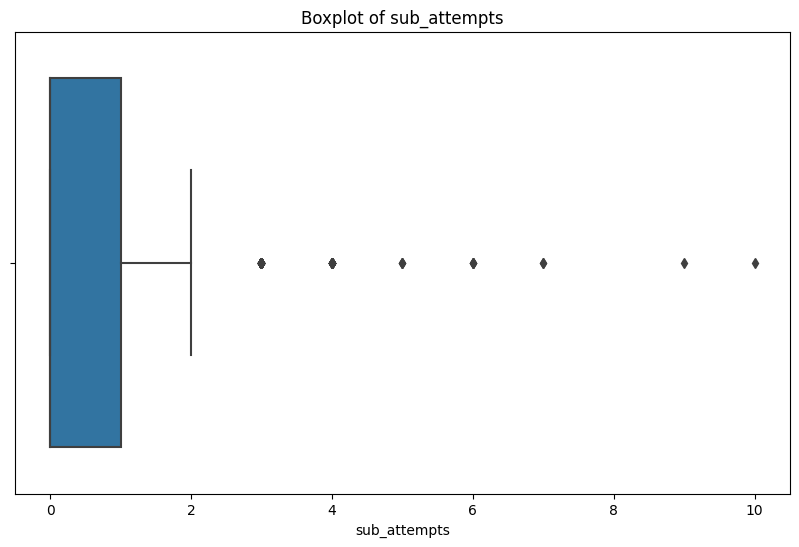

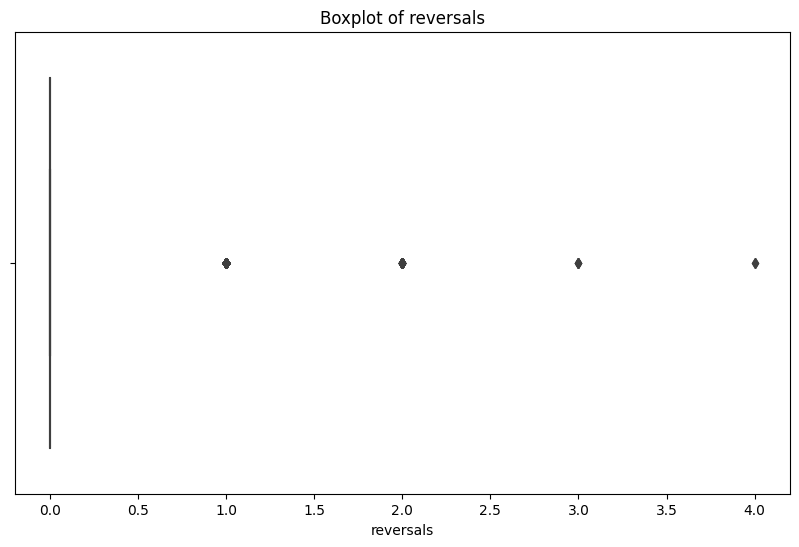

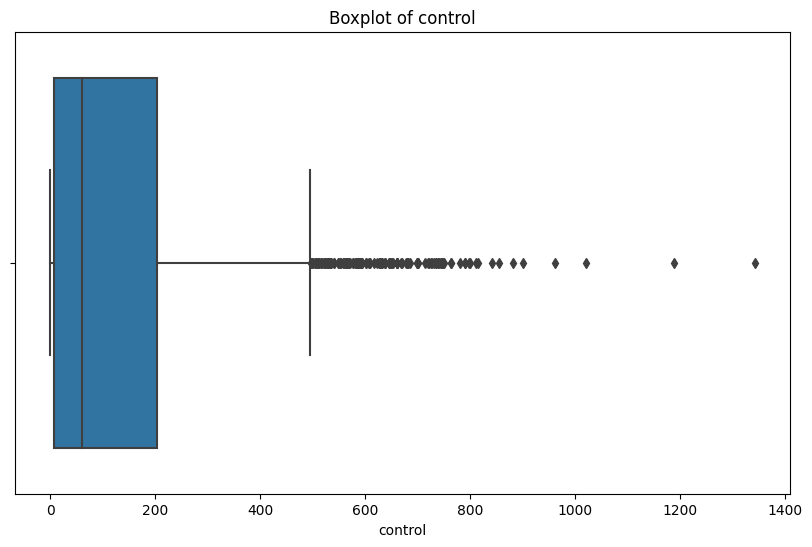

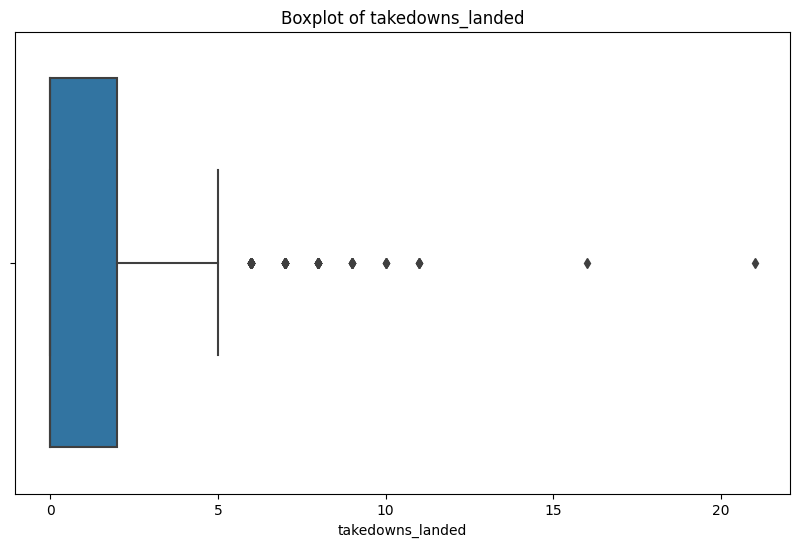

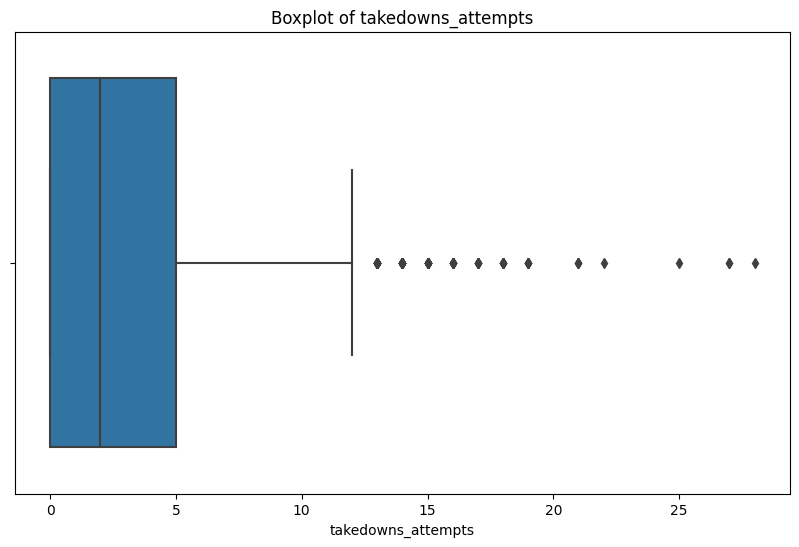

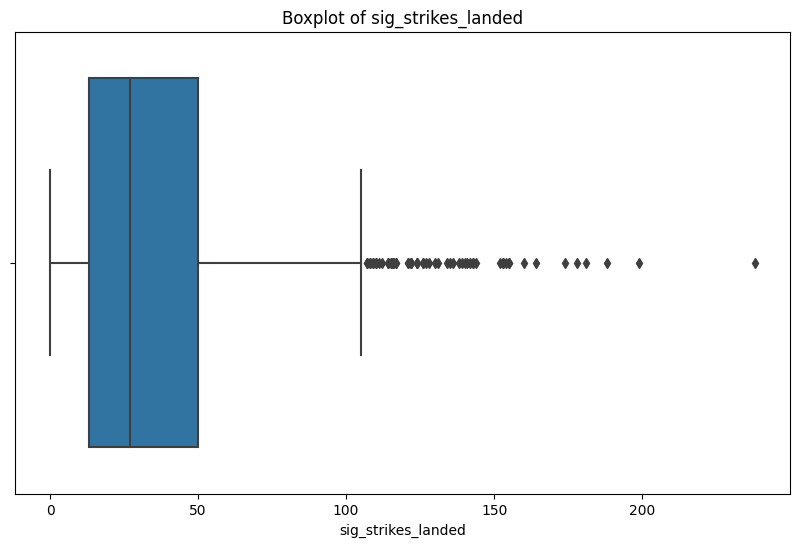

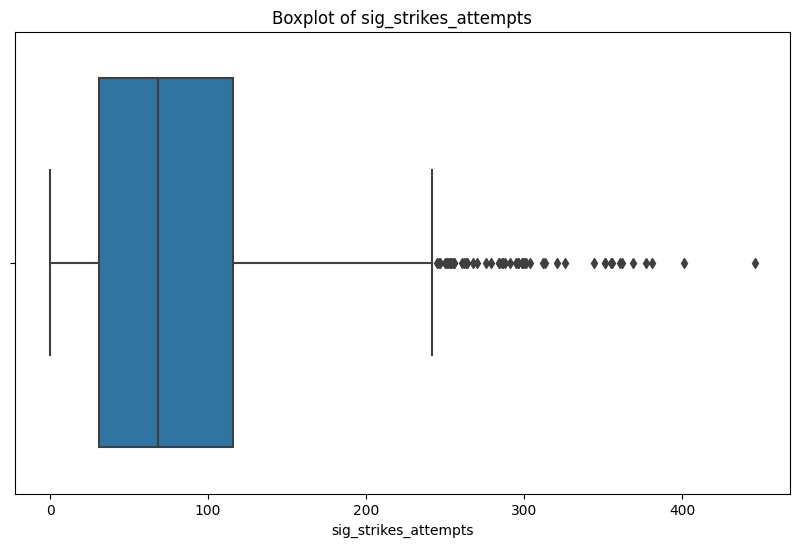

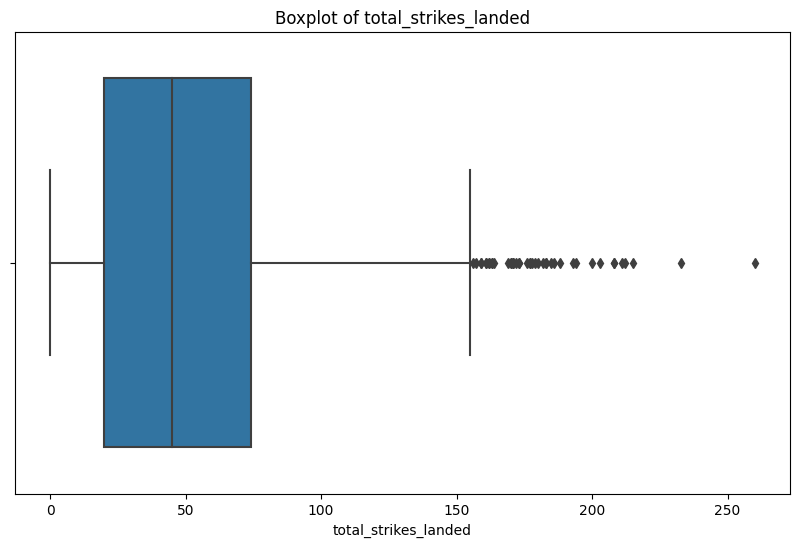

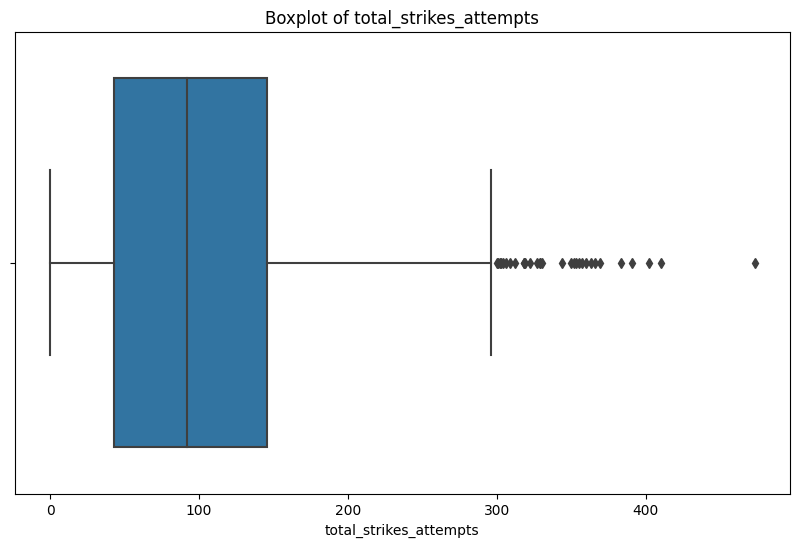

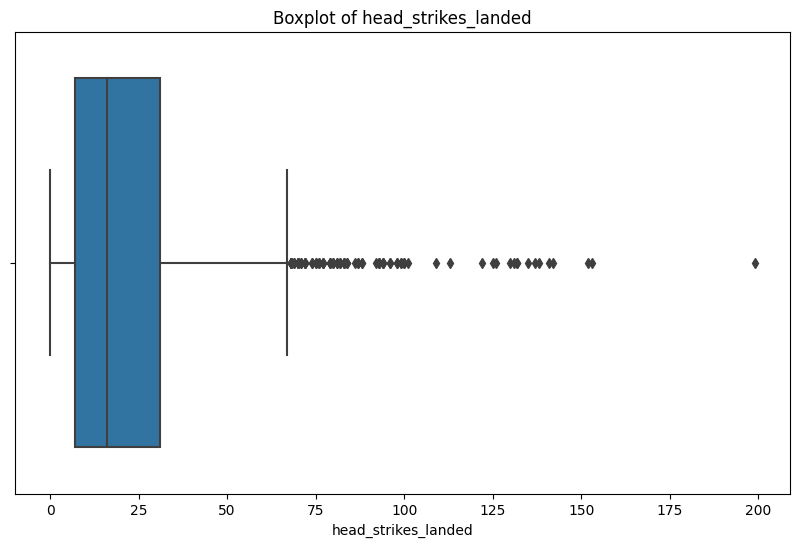

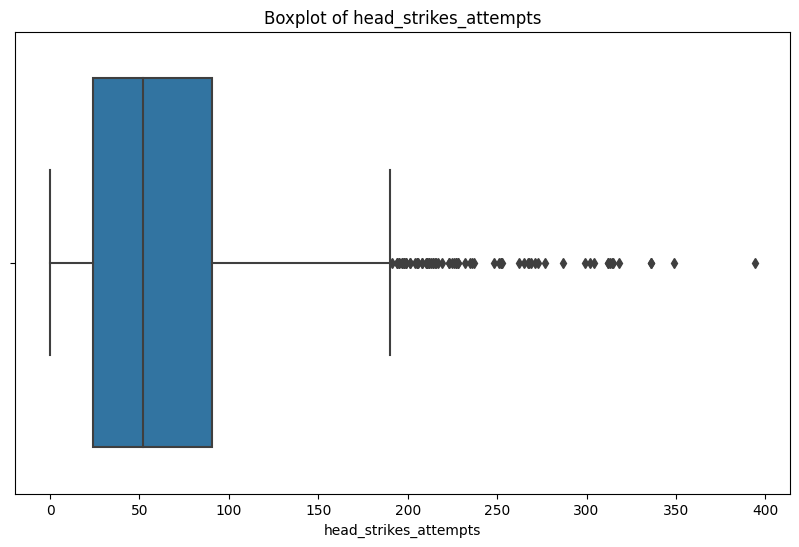

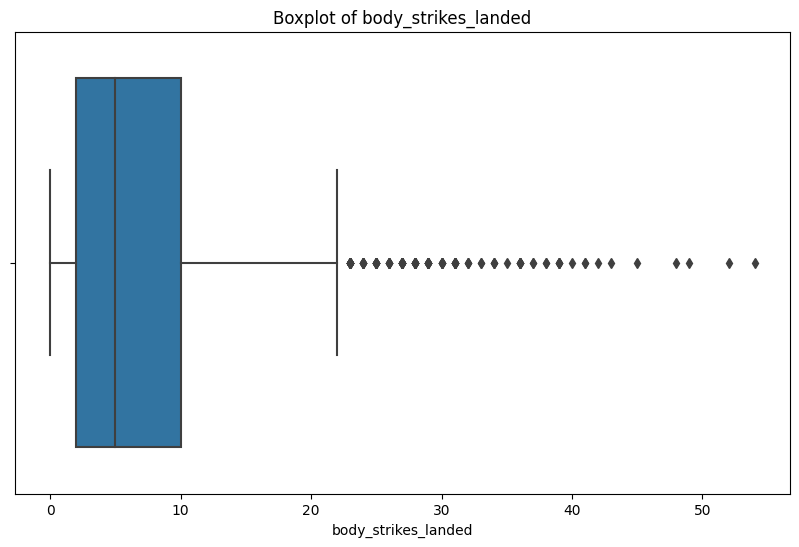

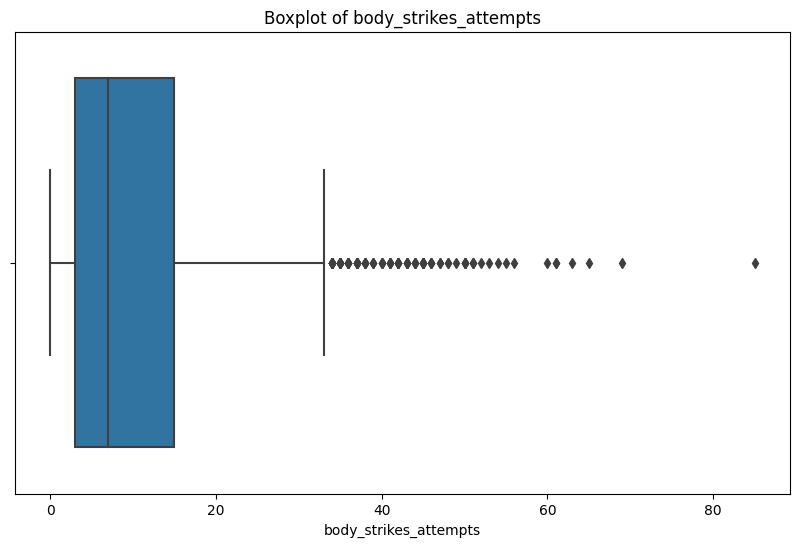

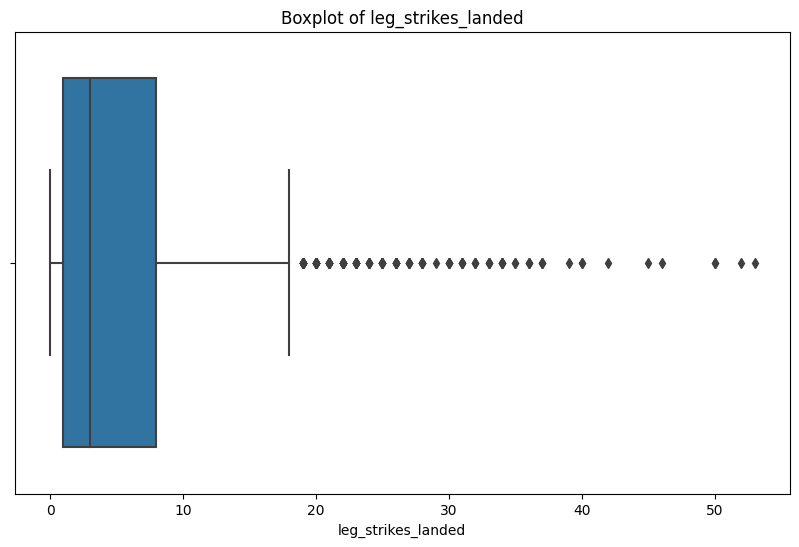

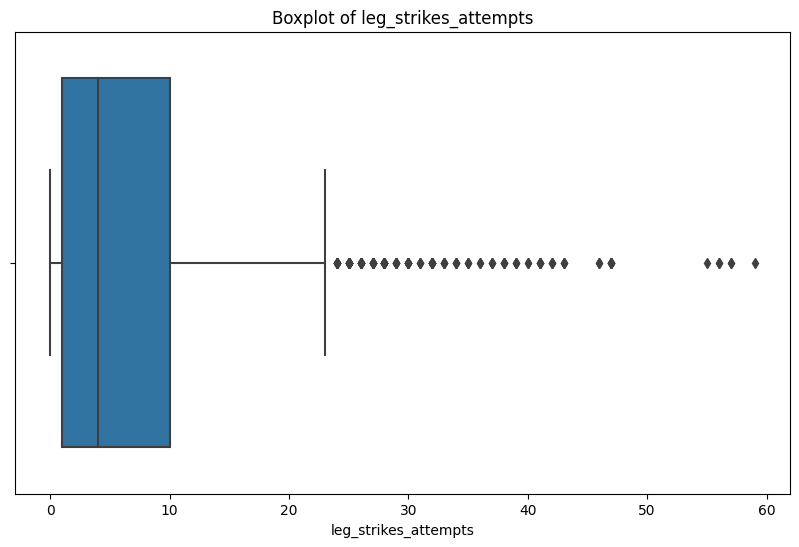

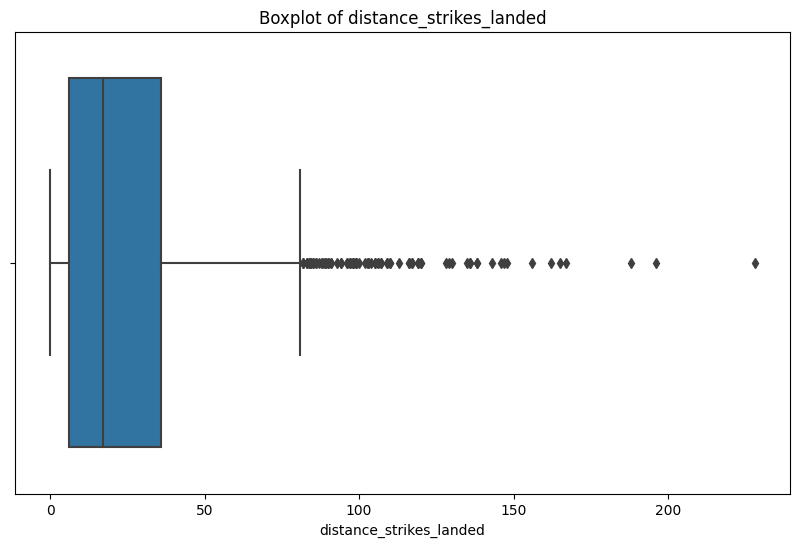

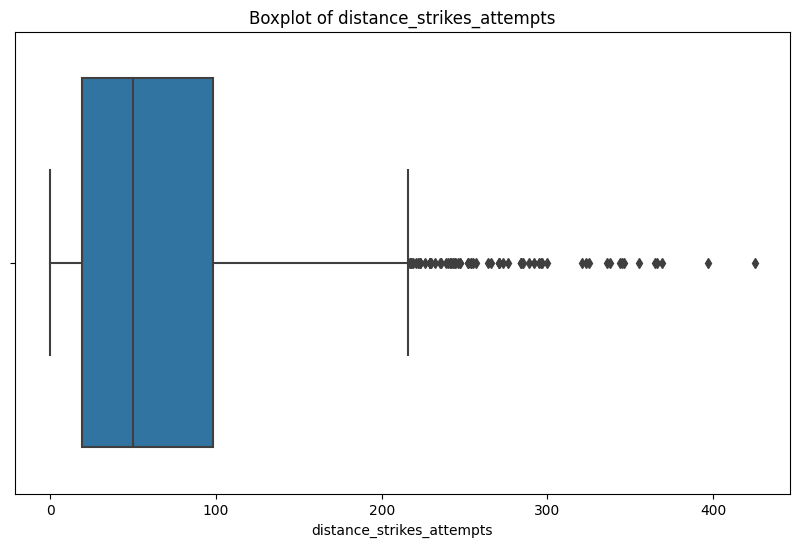

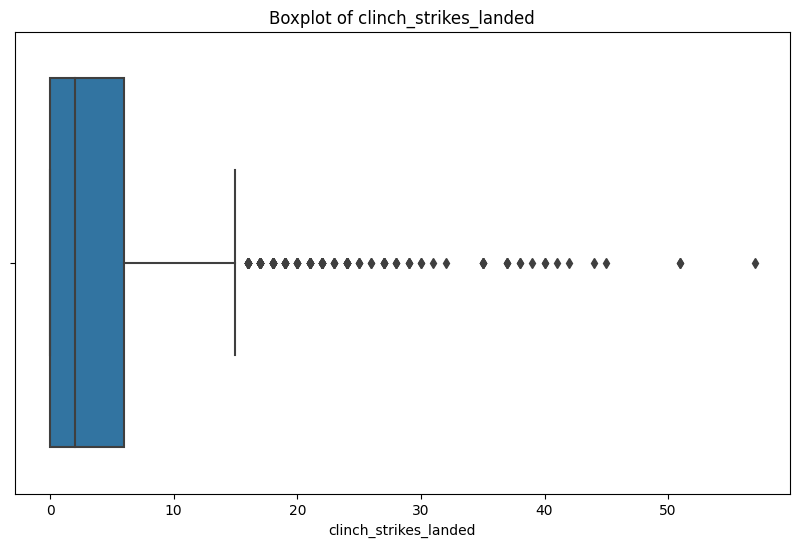

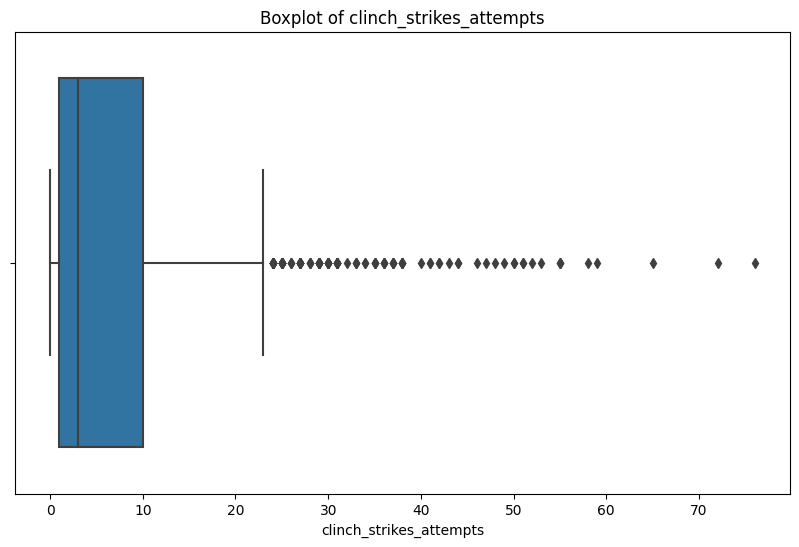

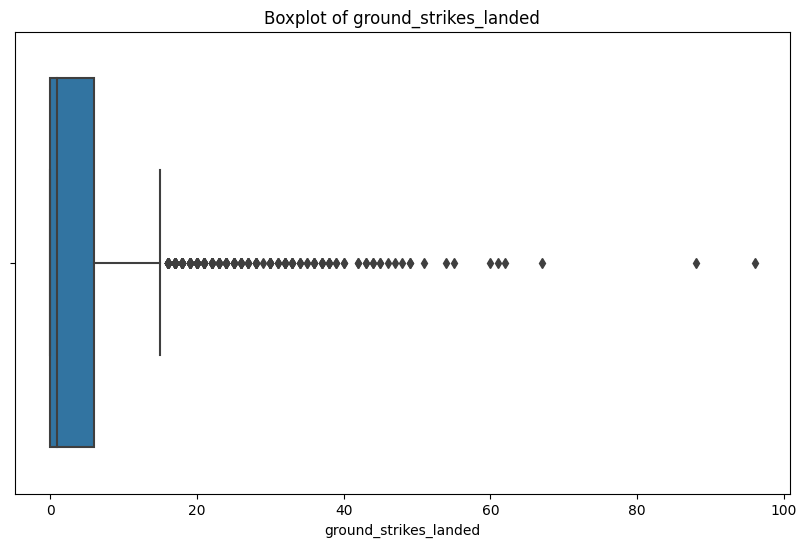

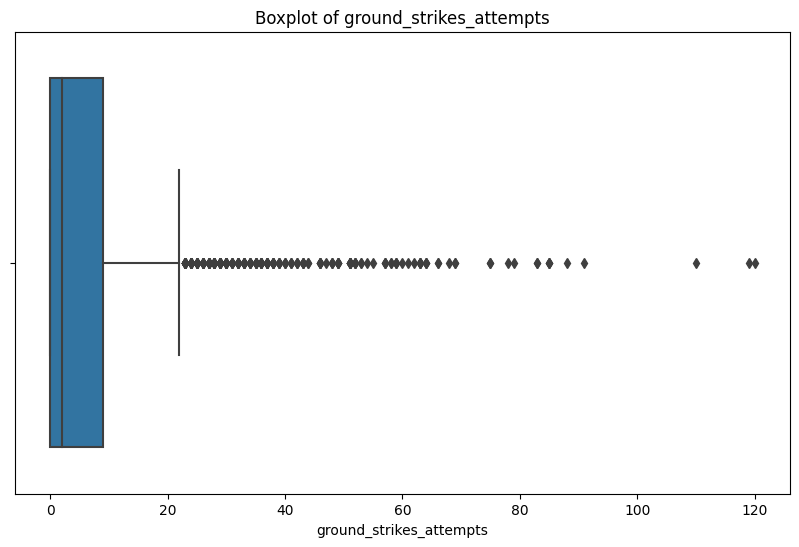

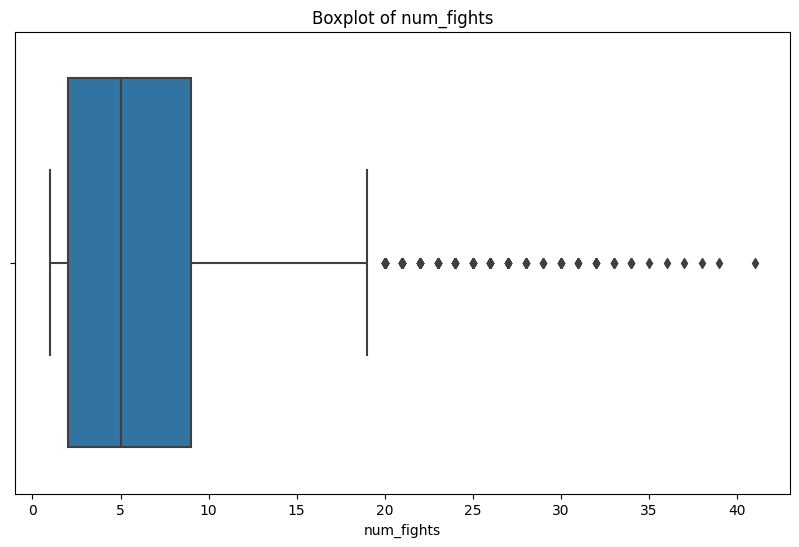

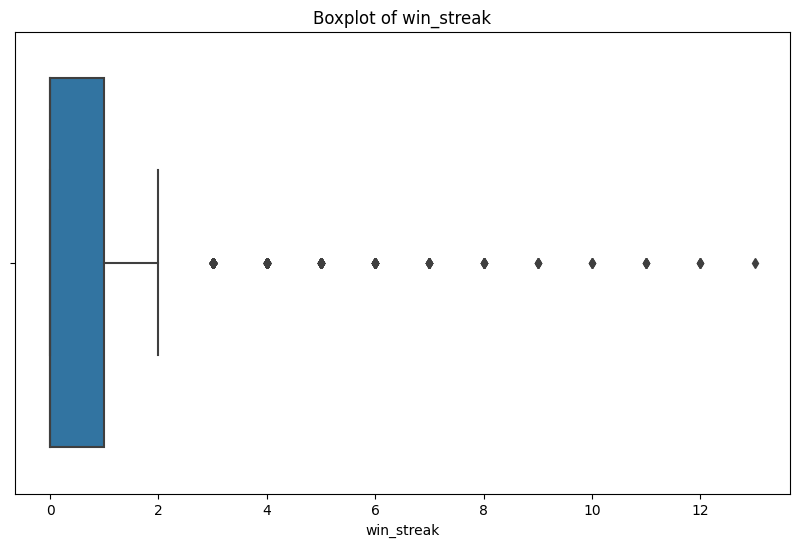

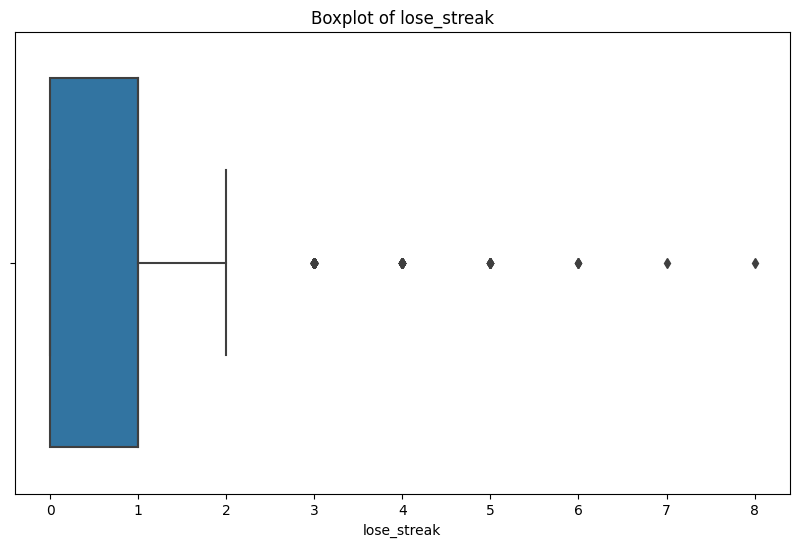

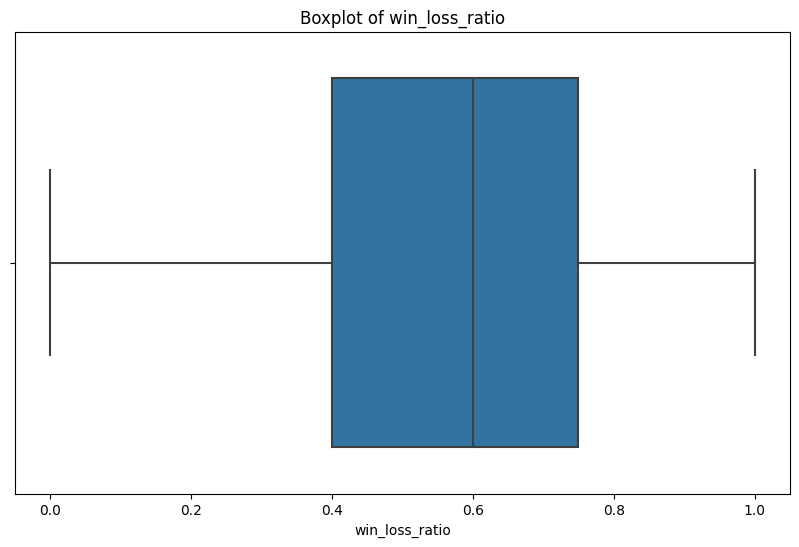

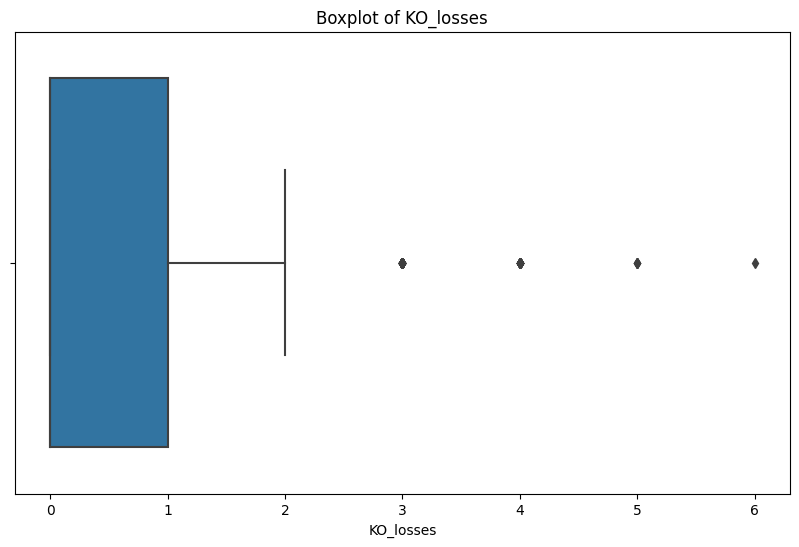

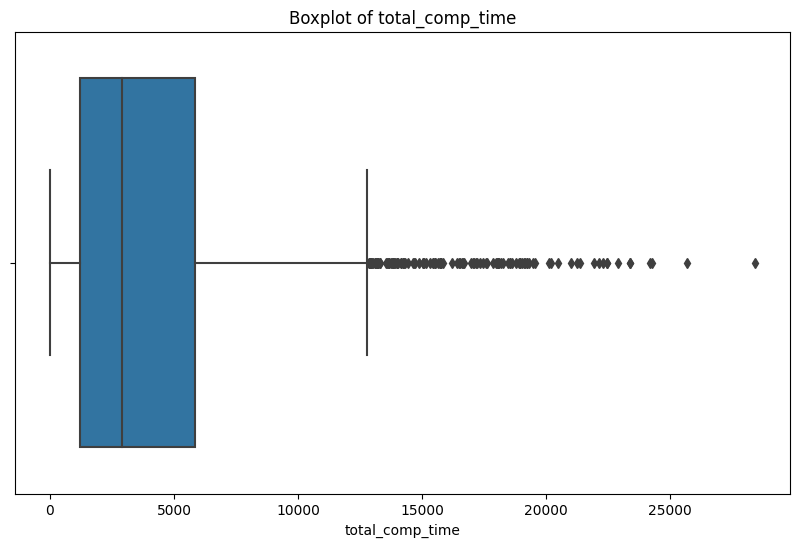

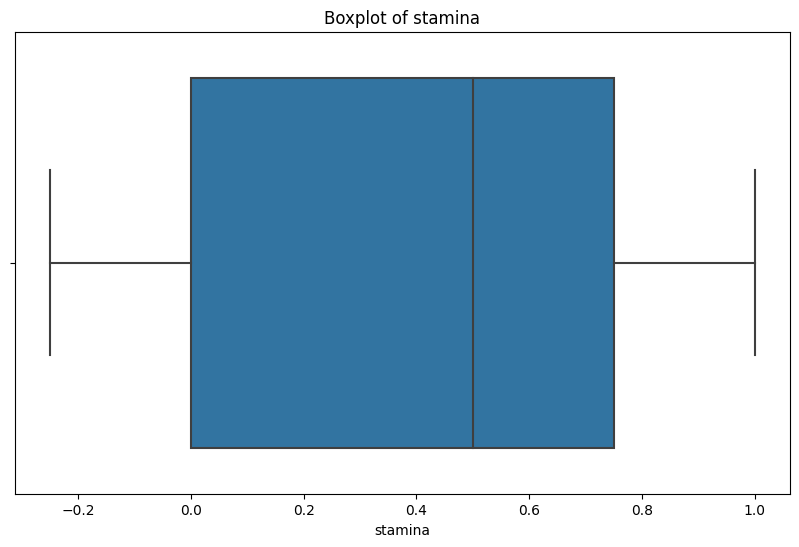

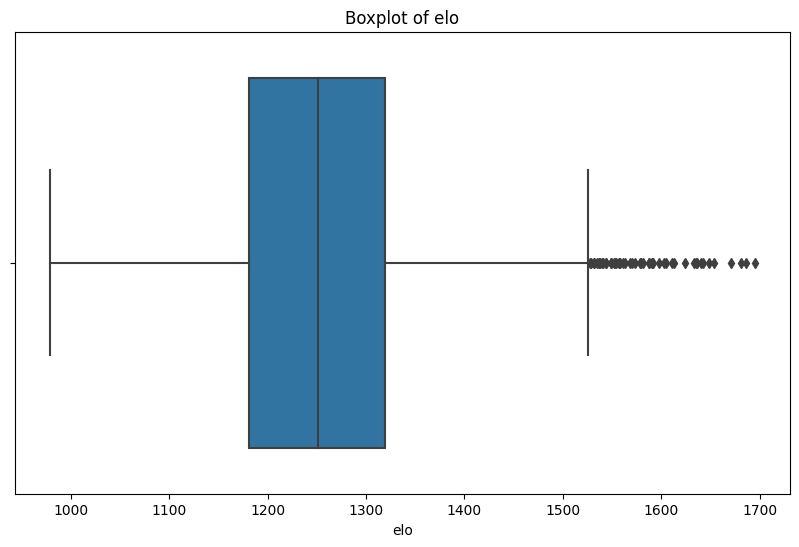

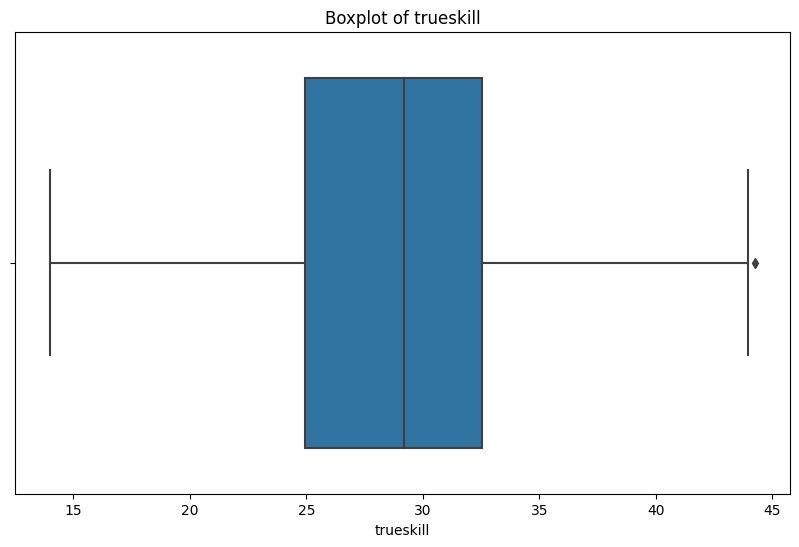

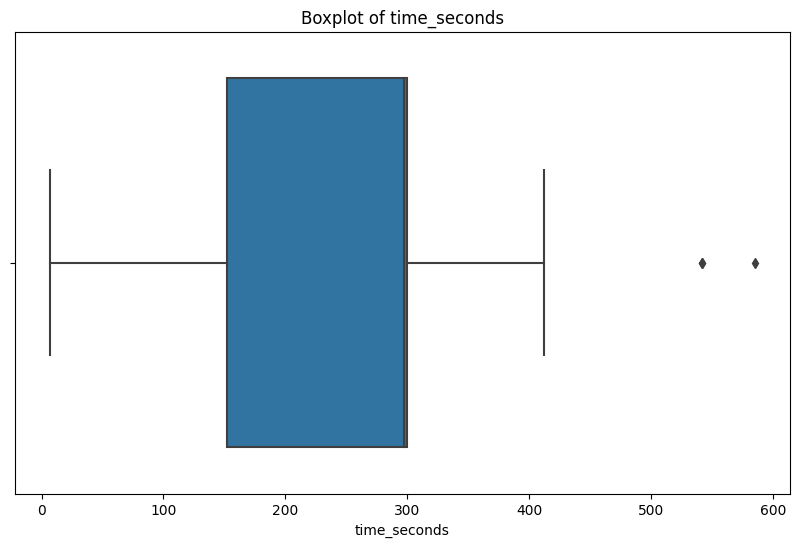

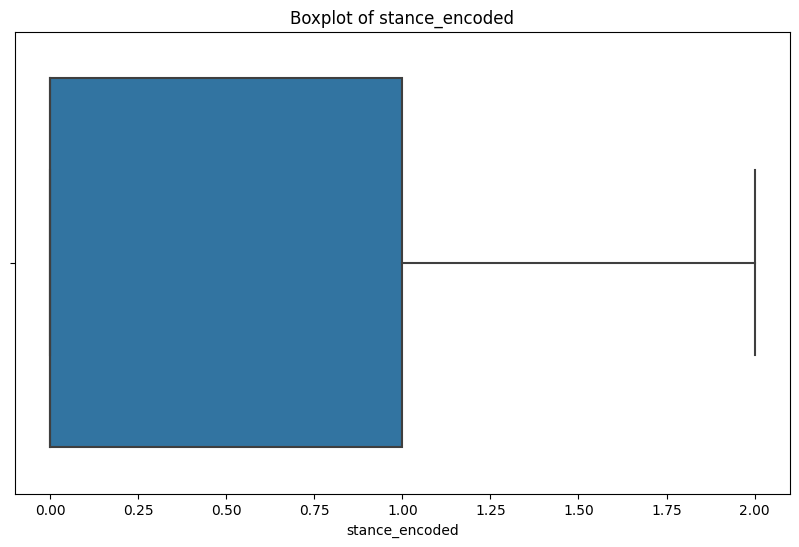

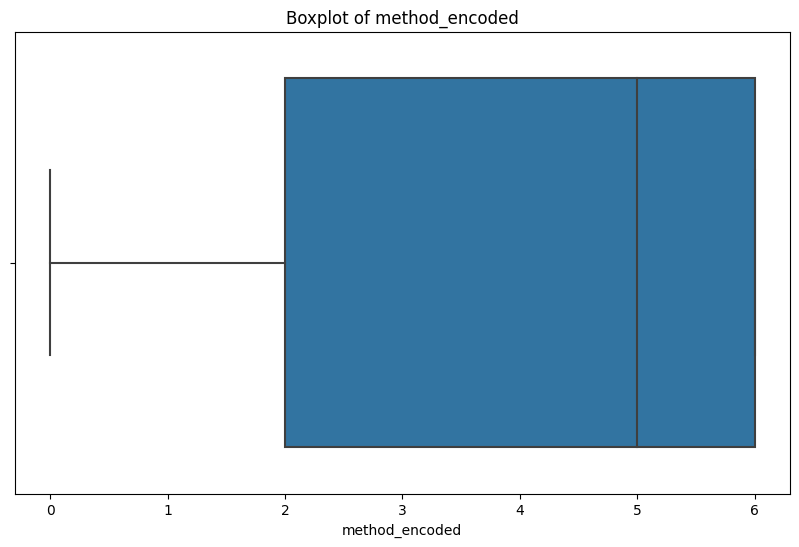

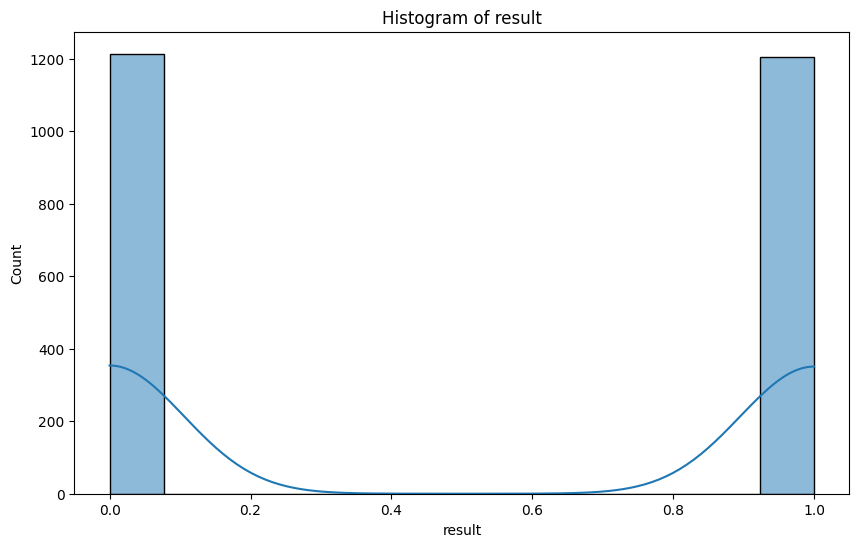

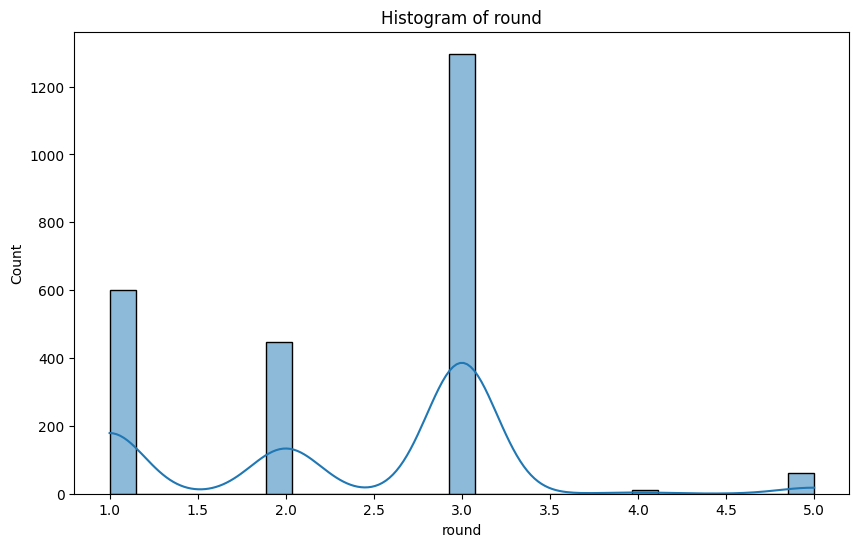

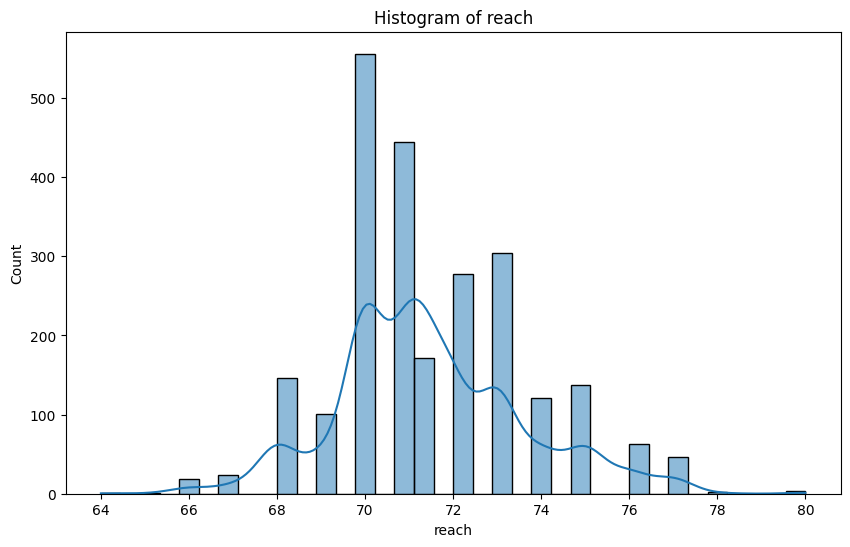

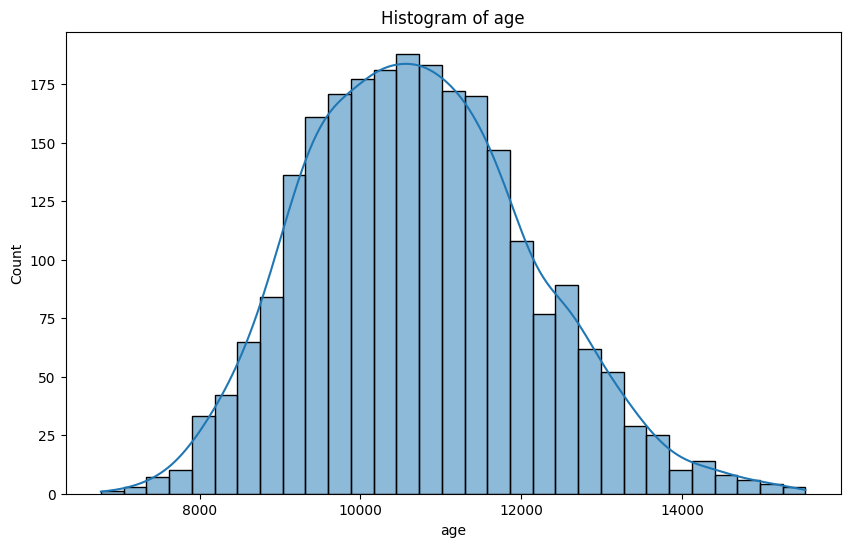

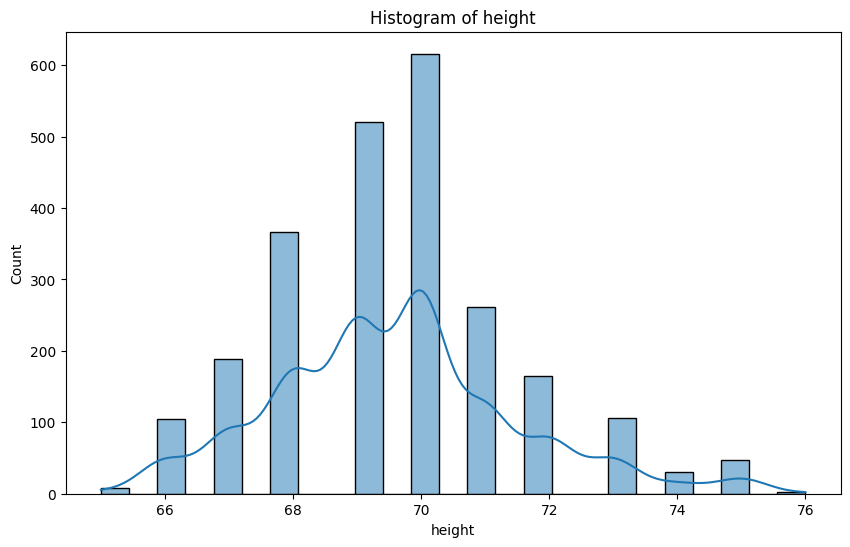

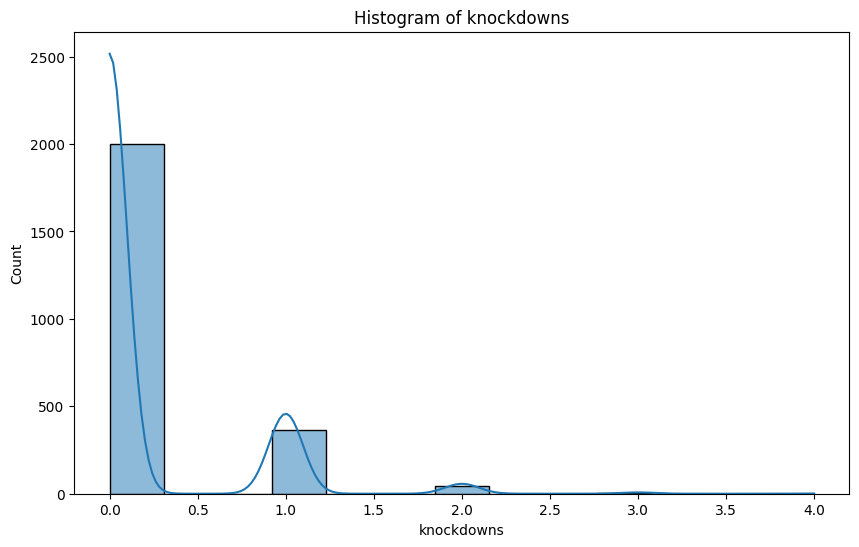

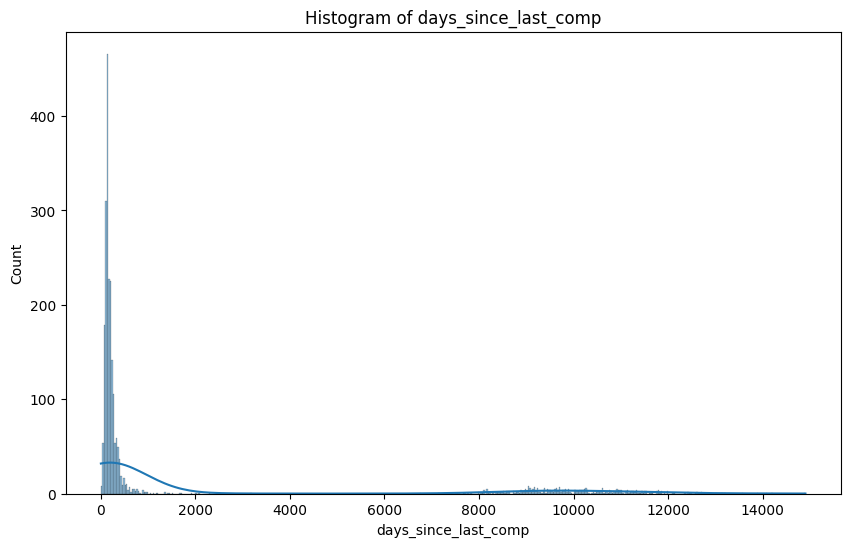

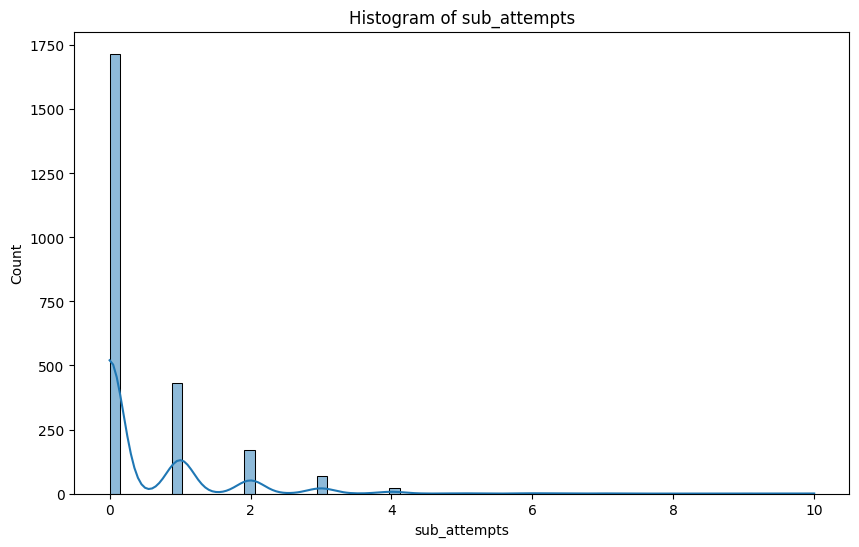

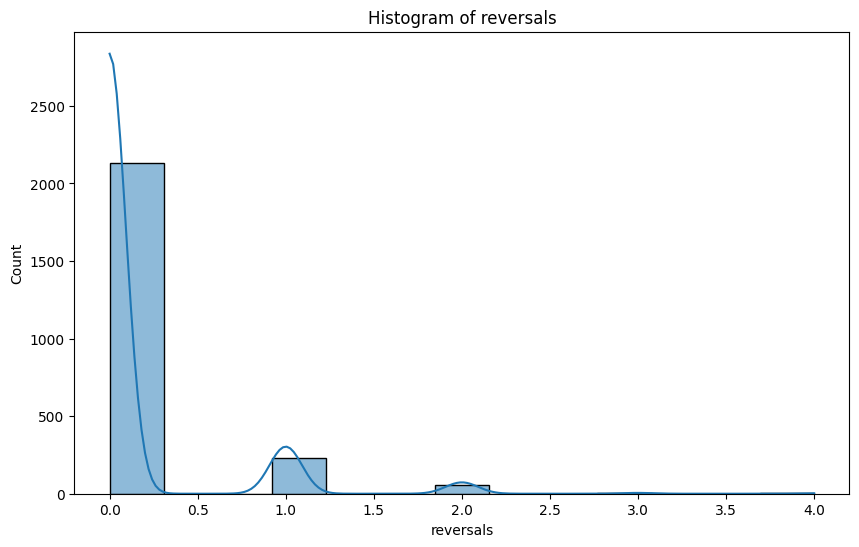

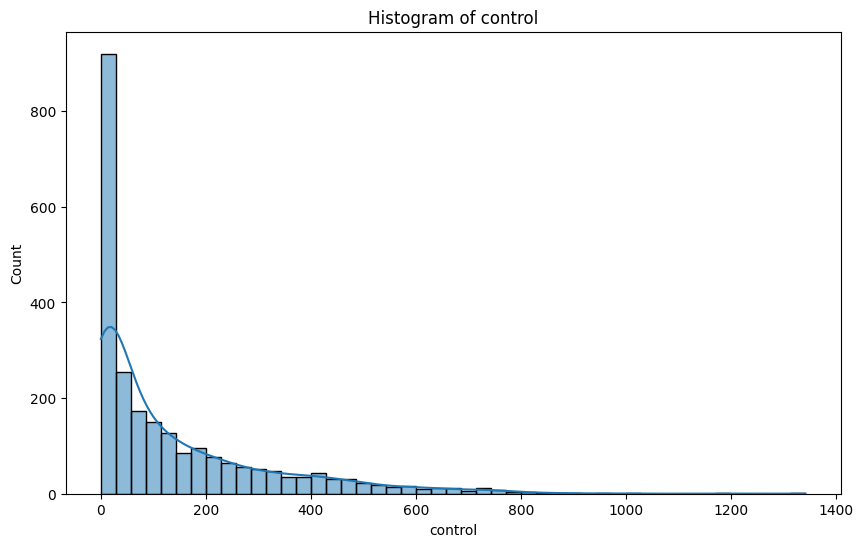

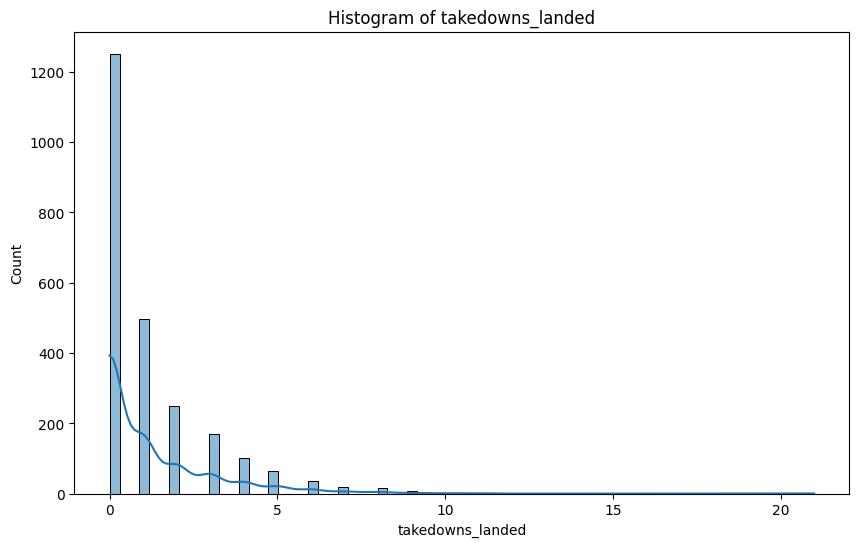

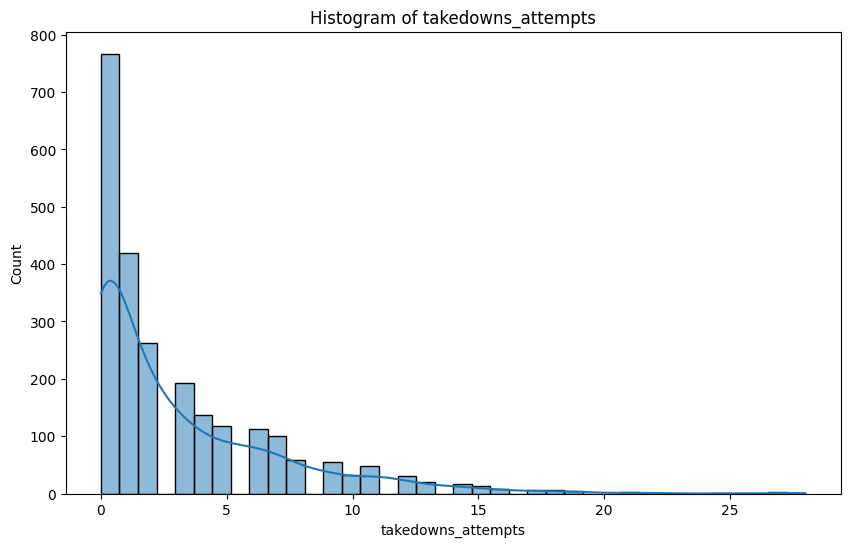

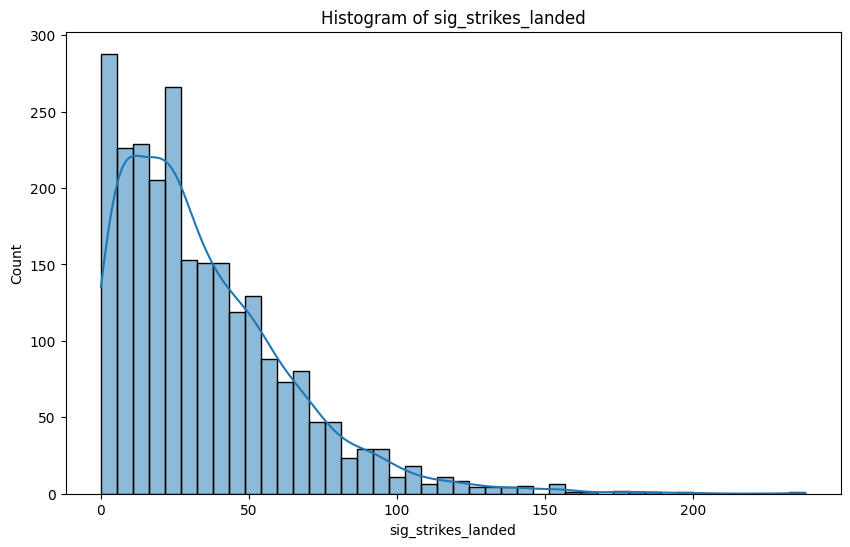

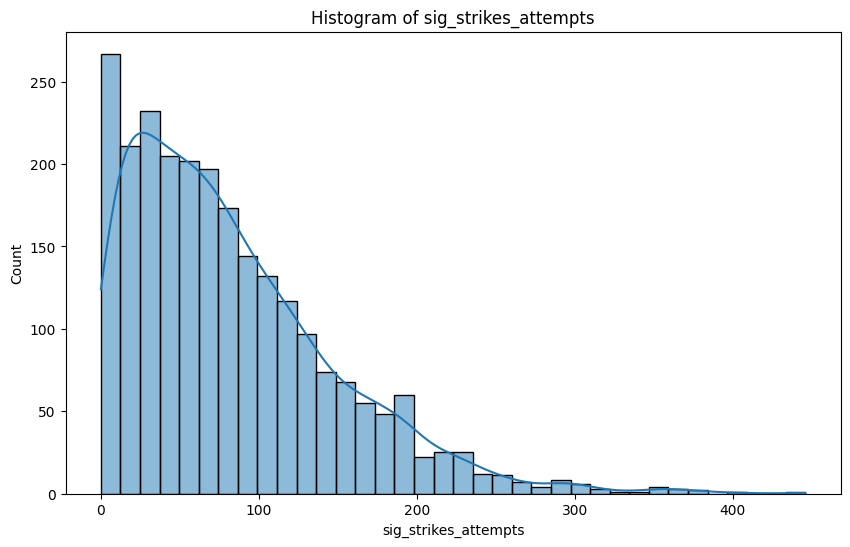

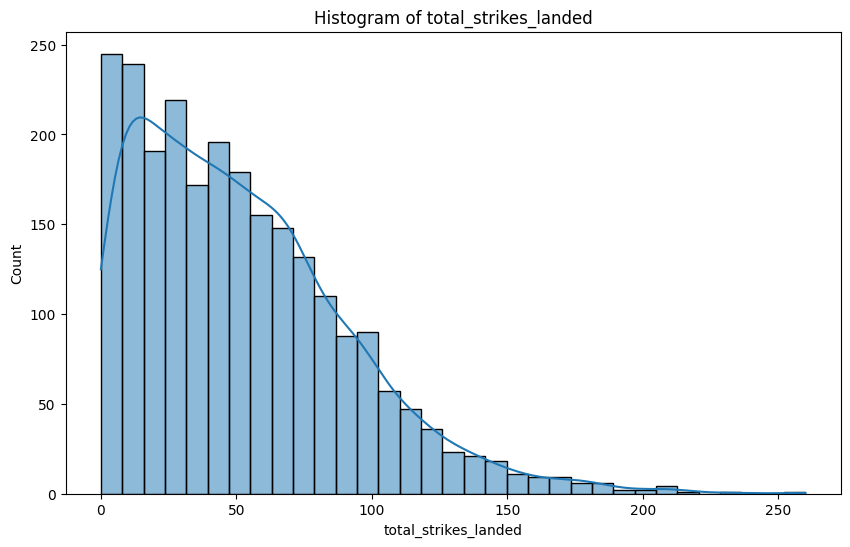

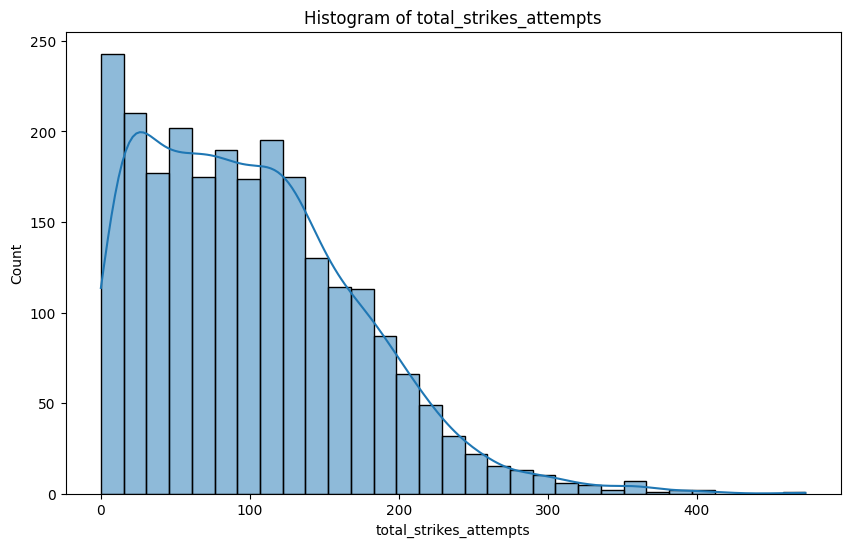

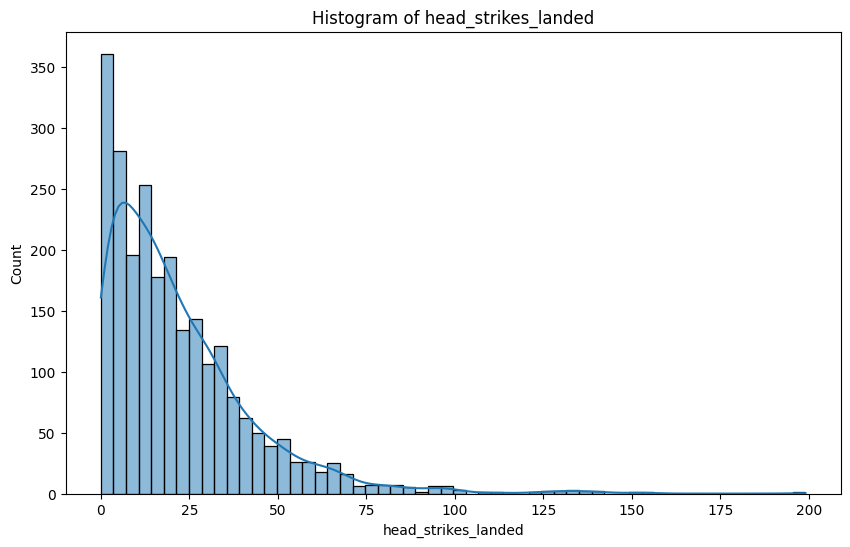

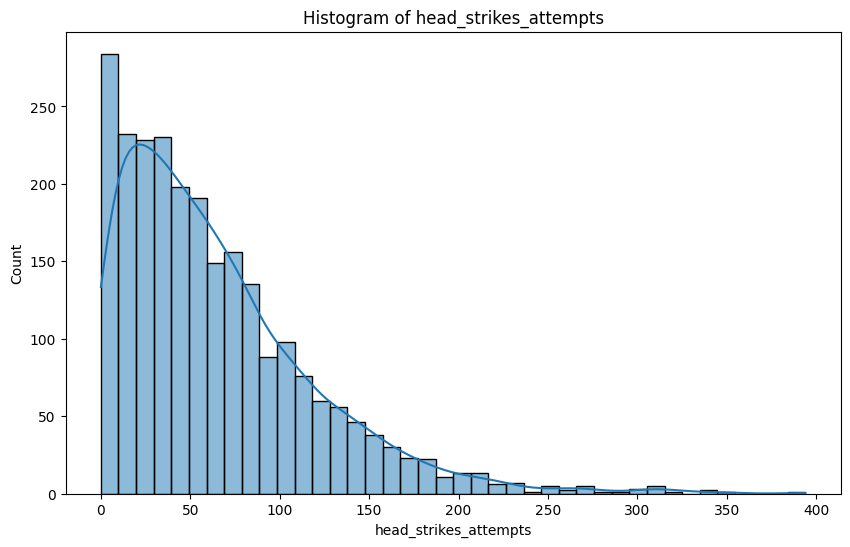

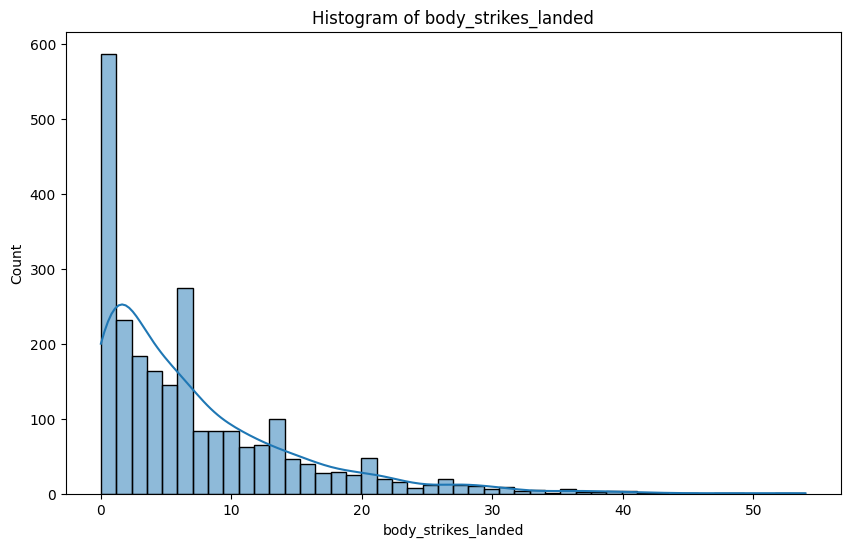

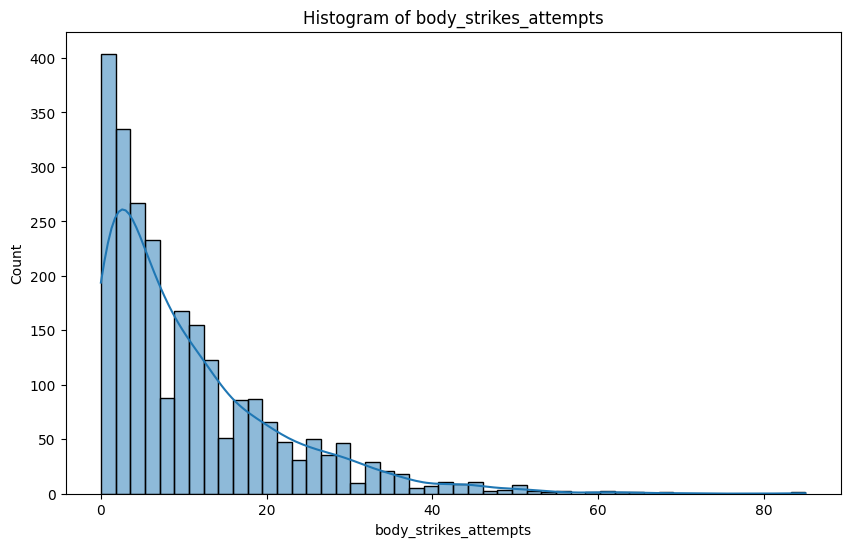

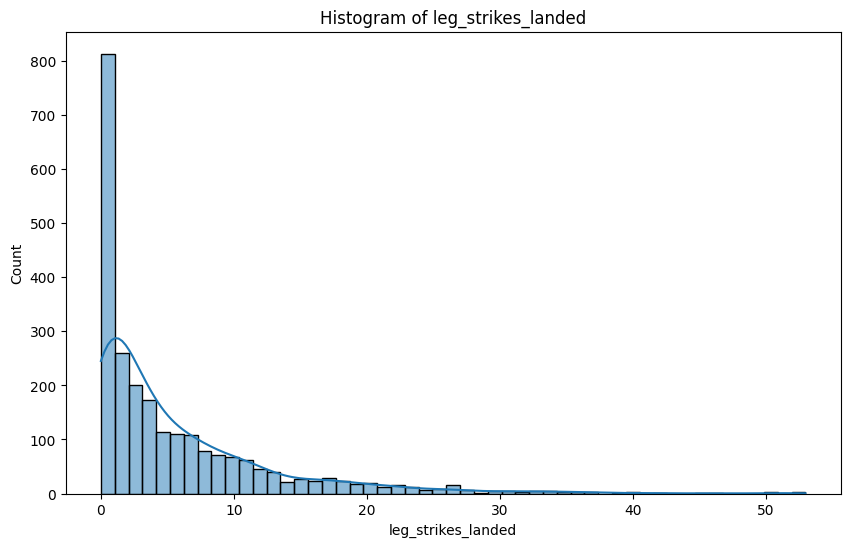

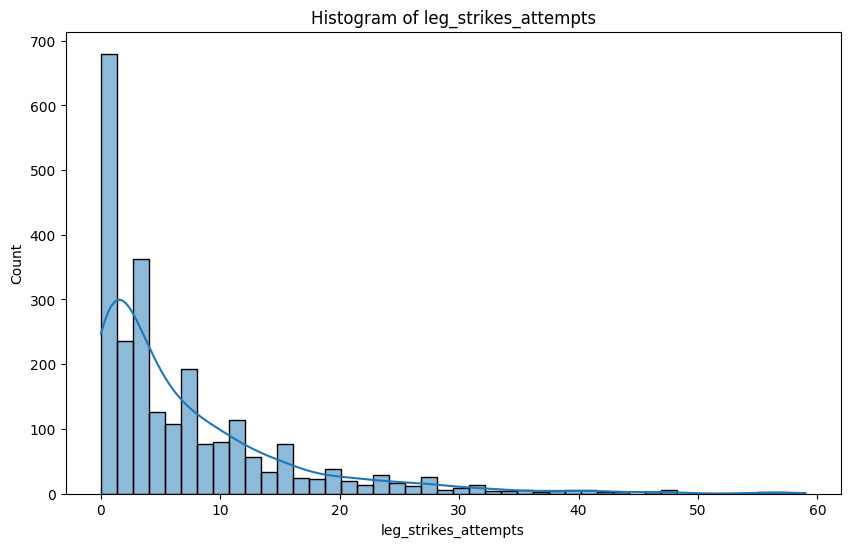

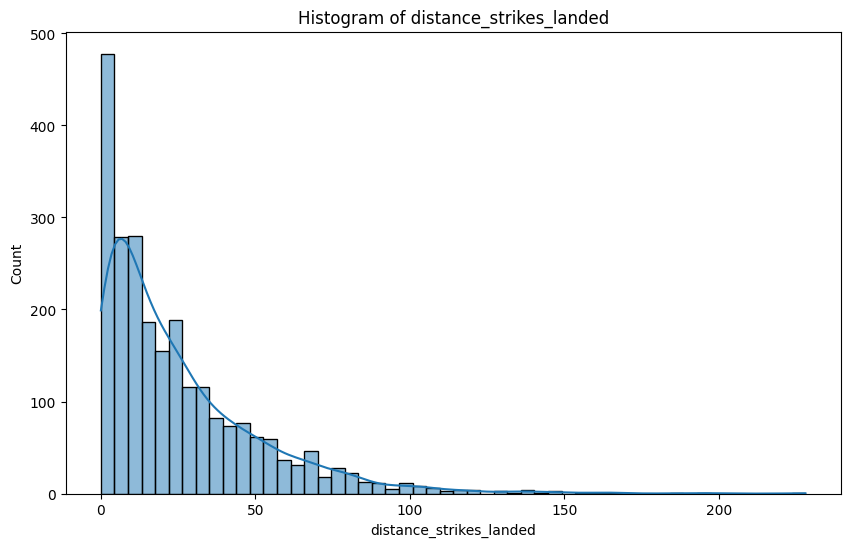

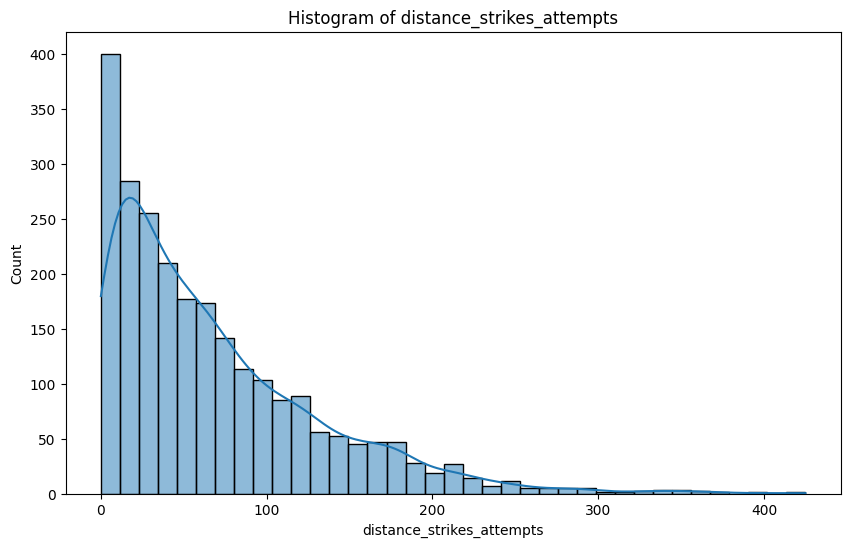

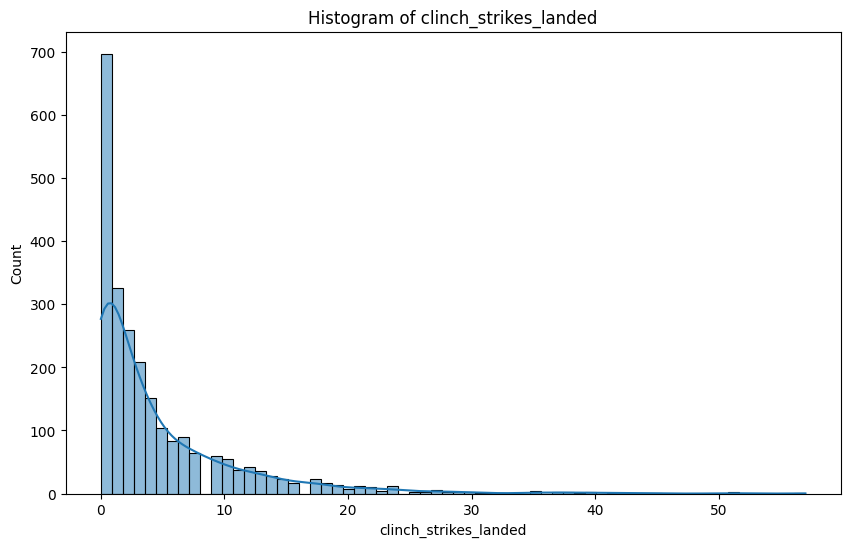

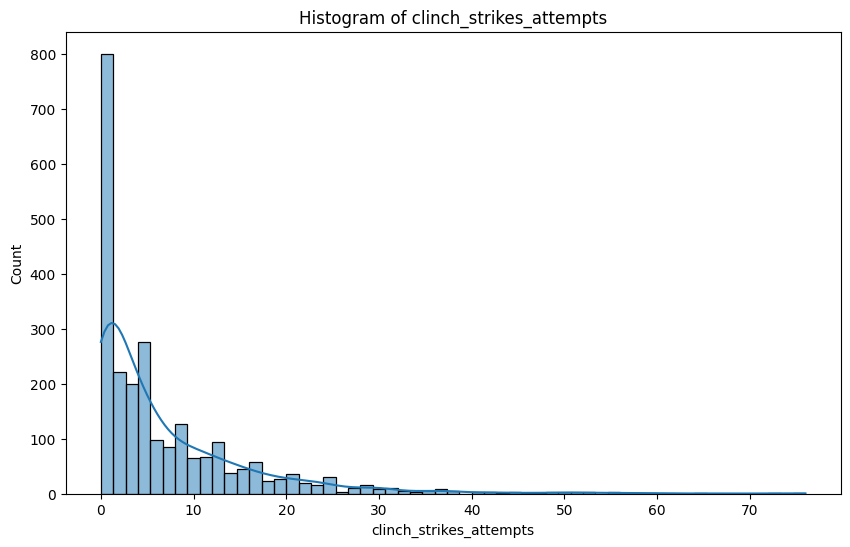

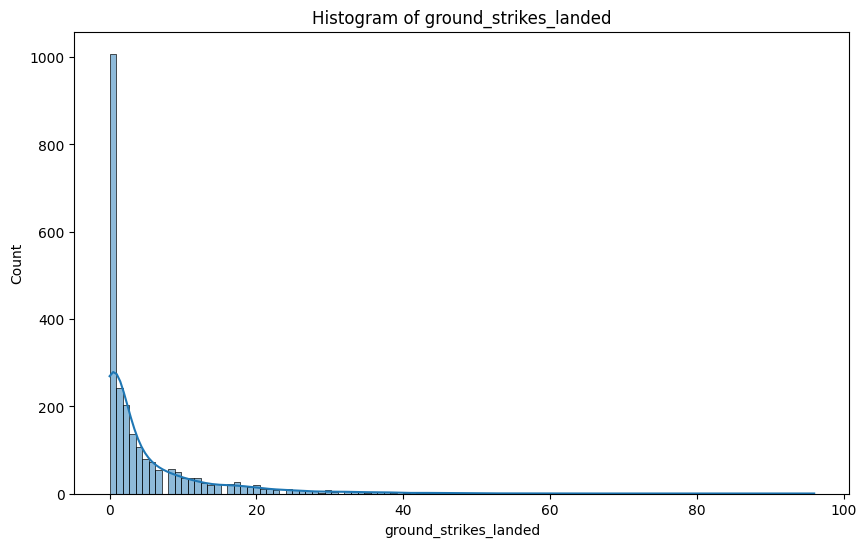

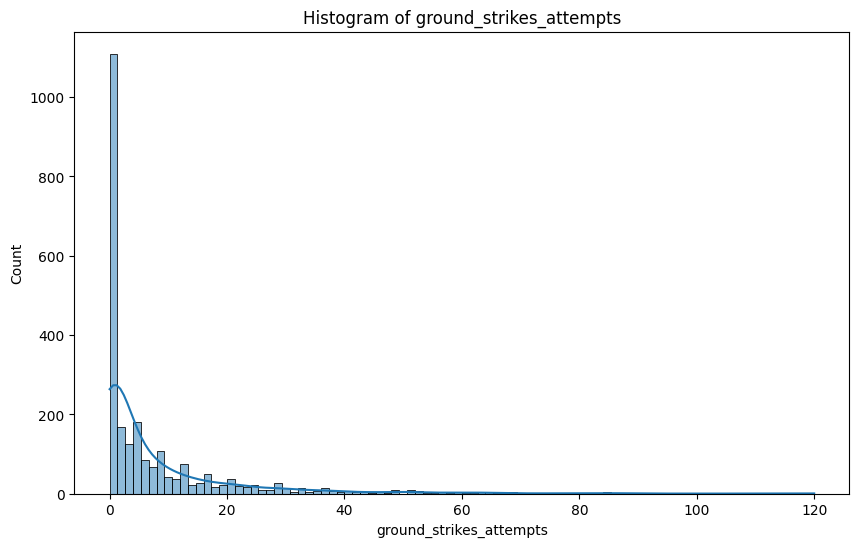

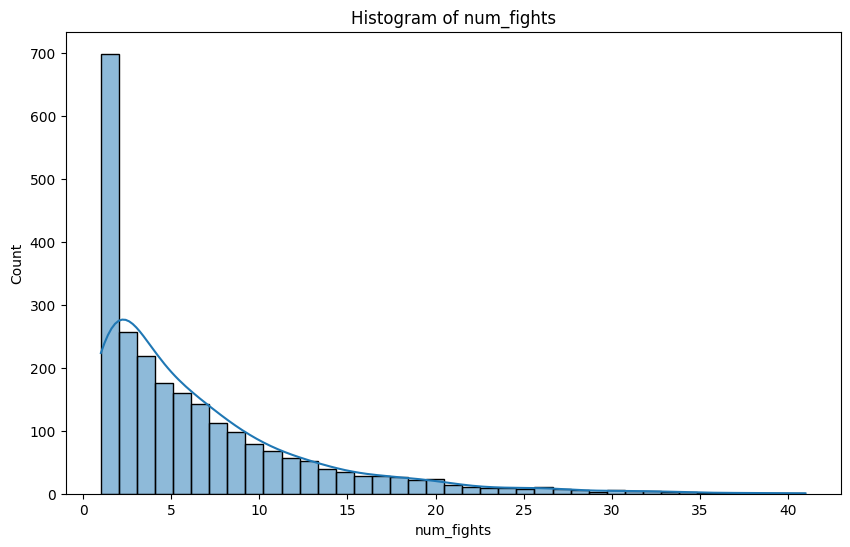

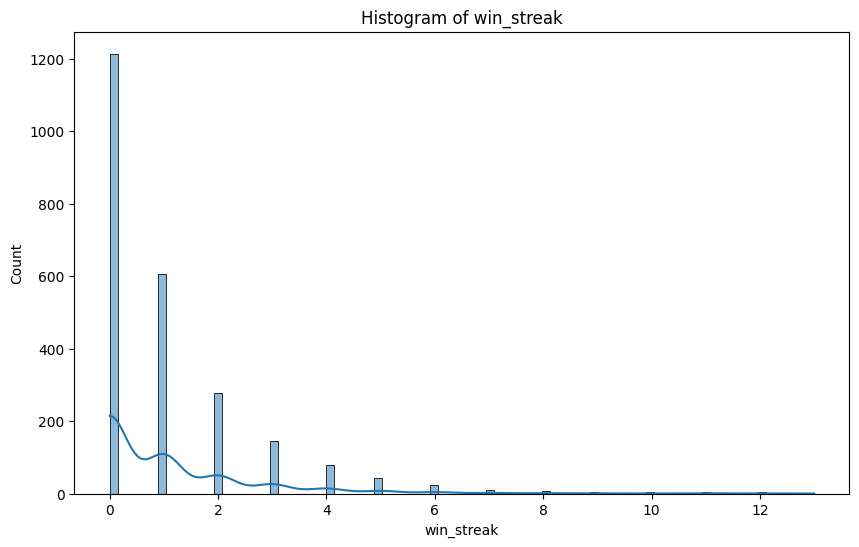

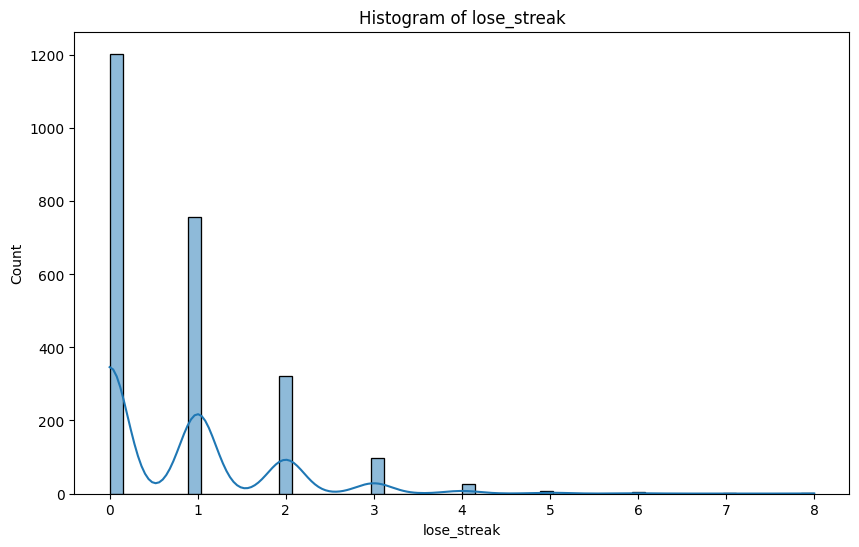

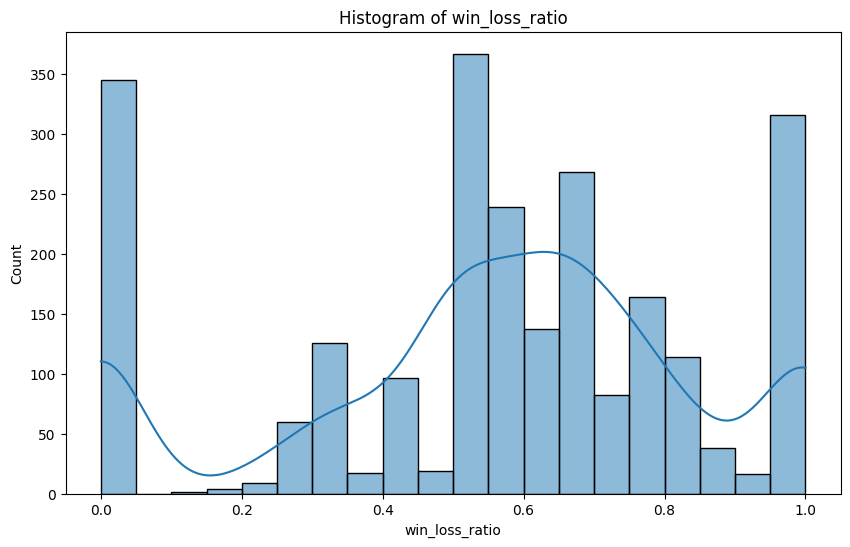

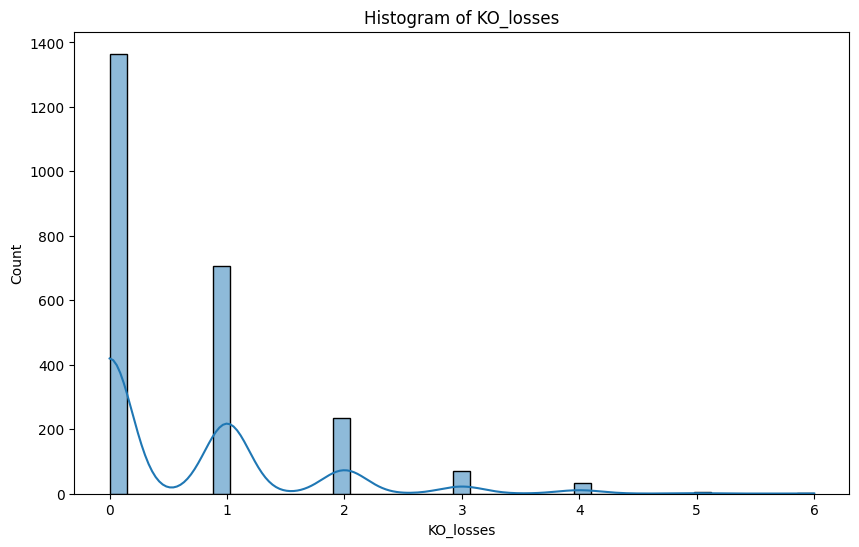

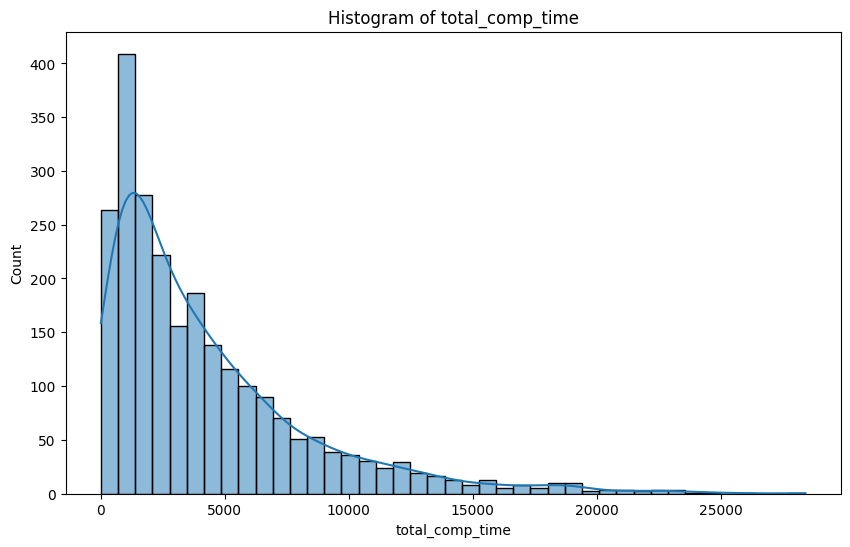

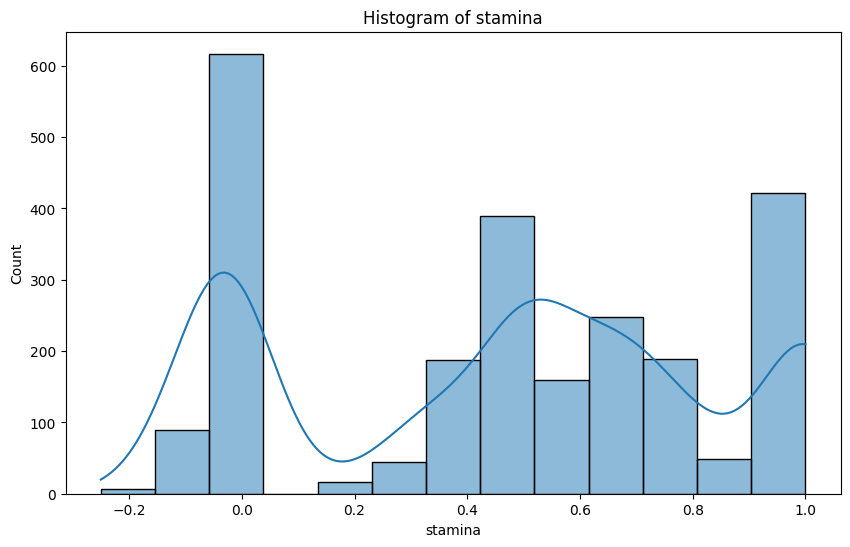

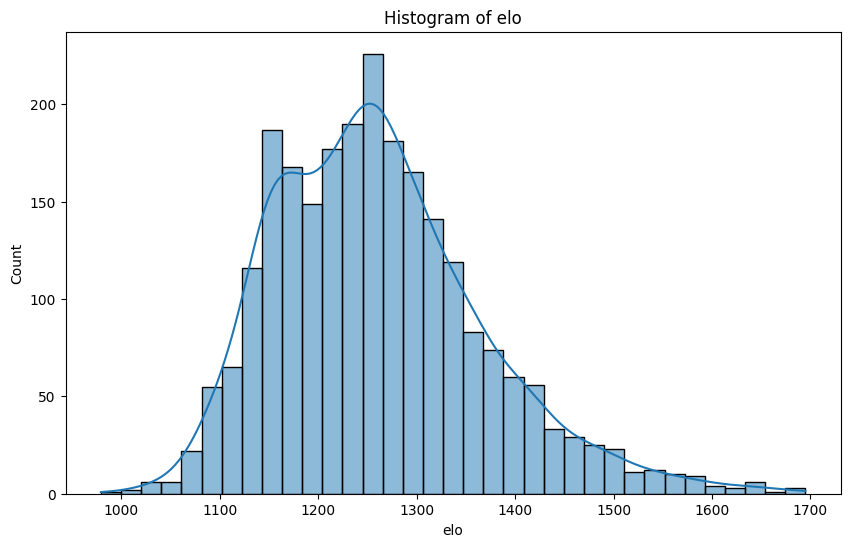

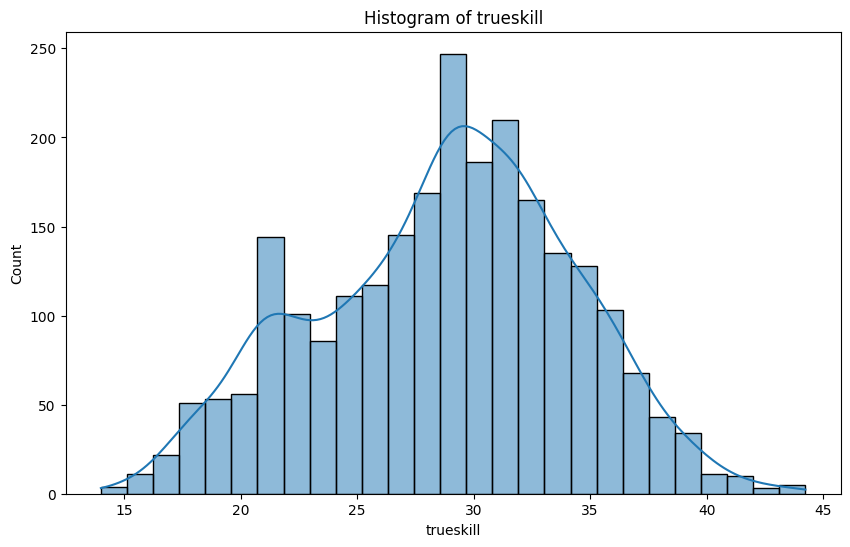

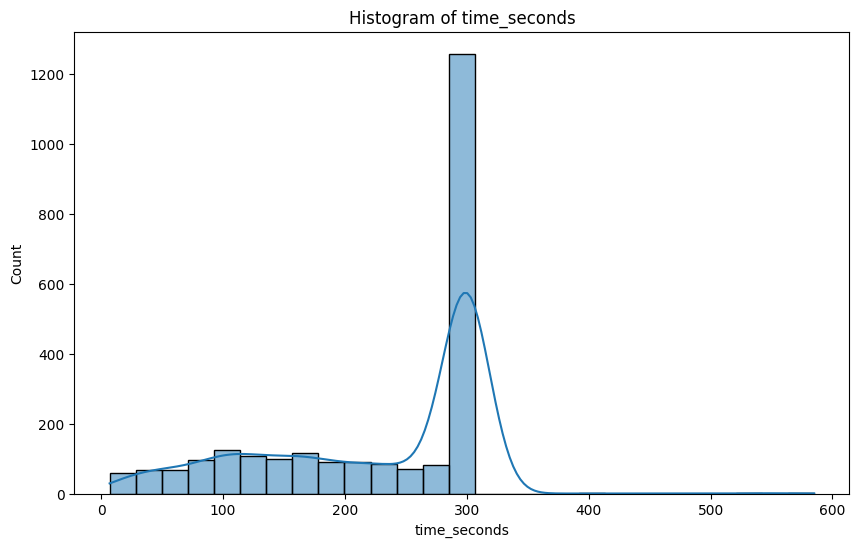

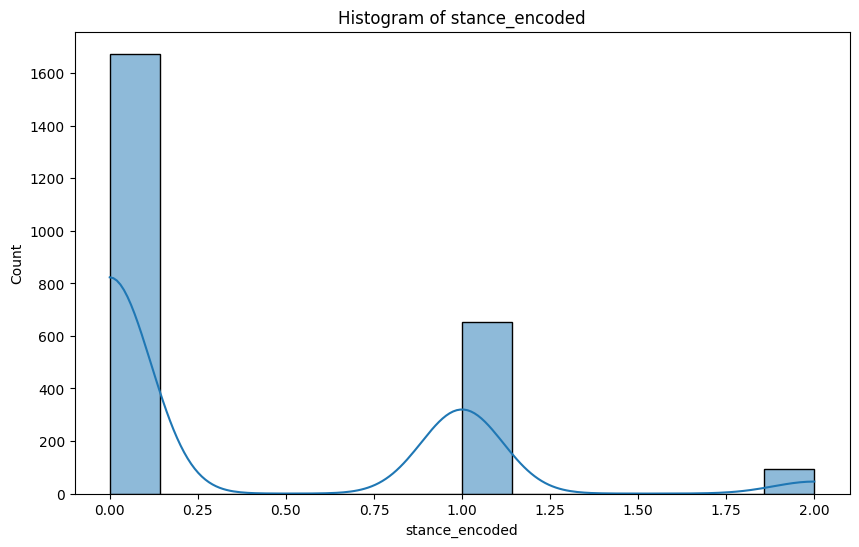

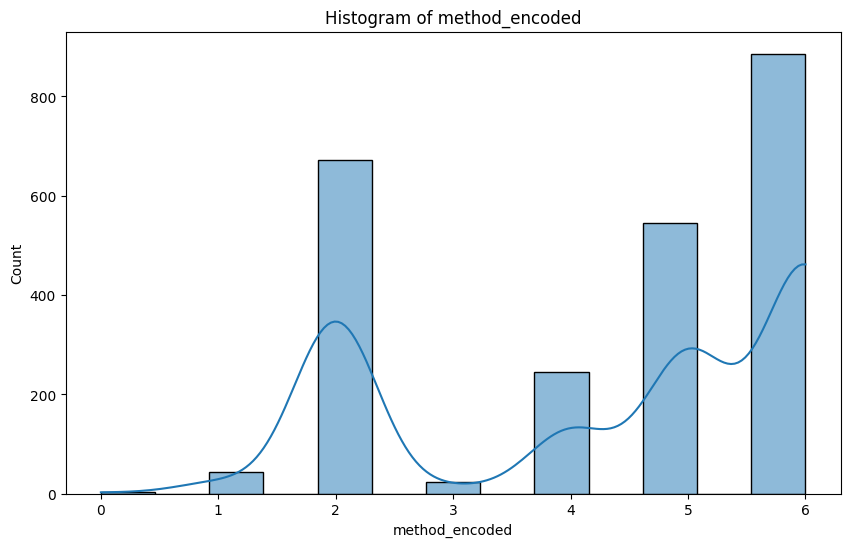

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for all numerical columns
for column in cleaned_lightweight.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cleaned_lightweight[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Histogram for all numerical columns
for column in cleaned_lightweight.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(cleaned_lightweight[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


In [20]:
# Detecting outliers using IQR
Q1 = cleaned_lightweight.quantile(0.25)
Q3 = cleaned_lightweight.quantile(0.75)
IQR = Q3 - Q1

multiplier = 3
outliers = ((cleaned_lightweight < (Q1 - multiplier * IQR)) | (cleaned_lightweight > (Q3 + multiplier * IQR)))

outlier_counts = outliers.sum(axis=0)
outlier_counts

result                         0
round                          0
reach                          0
age                            0
height                         0
knockdowns                   416
days_since_last_comp         396
sub_attempts                  11
reversals                    289
control                       12
takedowns_landed              14
takedowns_attempts             8
sig_strikes_landed             7
sig_strikes_attempts           4
total_strikes_landed           1
total_strikes_attempts         1
head_strikes_landed           17
head_strikes_attempts         13
body_strikes_landed           25
body_strikes_attempts         12
leg_strikes_landed            40
leg_strikes_attempts          34
distance_strikes_landed       19
distance_strikes_attempts     11
clinch_strikes_landed         40
clinch_strikes_attempts       31
ground_strikes_landed         94
ground_strikes_attempts      100
num_fights                    20
win_streak                    97
lose_strea

# LinUCB 

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import datetime

class LinUCB:
    def __init__(self, n_arms, n_features, alpha):
        self.n_arms = n_arms
        self.n_features = n_features
        self.alpha = alpha
        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def update(self, arm, context, reward):
        self.A[arm] += np.outer(context.astype(np.float64), context.astype(np.float64))
        self.b[arm] += reward * context.astype(np.float64)

    def recommend(self, context):
        scores = np.zeros(self.n_arms)
        thetas = [np.zeros(self.n_features) for _ in range(self.n_arms)]
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            theta = A_inv @ self.b[arm]
            p_arm = theta.T @ context + self.alpha * np.sqrt(context.T @ A_inv @ context)
            scores[arm] = p_arm
            thetas[arm] = theta
        return np.argmax(scores), thetas, scores

# Load and preprocess your MMA dataset
data = pd.read_csv('/kaggle/input/mma-differentials-and-elo/masterdataframe.csv')

# Convert "date" column to Timestamp type
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Perform train-test split based on the date column
date_threshold = datetime.date(2021, 1, 1)
train_data = data[data['date'].dt.date < date_threshold]
test_data = data[data['date'].dt.date >= date_threshold]

# Check available columns
print(train_data.columns)

# Feature selection (adjust based on your dataset)
selected_columns = [
    'num_fights', 'win_streak', 'lose_streak', 'win_loss_ratio', 'KO_losses',
    'total_comp_time', 'stamina', 'elo', 'trueskill', 'time_seconds',
    'stance_encoded', 'method_encoded',
    'reach', 'height', 'age', 'avg_knockdowns', 'avg_takedowns_landed',
    'sub_attempts_per_min', 'takedowns_landed_per_min', 'takedowns_attempts_per_min',
    'sig_strikes_landed_per_min', 'sig_strikes_attempts_per_min',
    'total_strikes_landed_per_min', 'total_strikes_attempts_per_min',
    'head_strikes_landed_per_min', 'head_strikes_attempts_per_min',
    'body_strikes_landed_per_min', 'body_strikes_attempts_per_min',
    'leg_strikes_landed_per_min', 'leg_strikes_attempts_per_min',
    'distance_strikes_landed_per_min', 'distance_strikes_attempts_per_min',
    'clinch_strikes_landed_per_min', 'clinch_strikes_attempts_per_min',
    'ground_strikes_landed_per_min', 'ground_strikes_attempts_per_min'
]

# Check if selected columns are present in the dataset
missing_columns = set(selected_columns) - set(train_data.columns)
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # LinUCB Initialization
    n_arms = 2  # Assuming two arms: fighter 1 and fighter 2
    n_features = len(selected_columns)
    alpha = 0.9
    linucb = LinUCB(n_arms, n_features, alpha)

    # Training the LinUCB
    for index, row in train_data.iterrows():
        context = row[selected_columns].values
        arm_selected, _, _ = linucb.recommend(context)
        reward_observed = 1 if arm_selected == 0 else 0  # Replace with your actual reward mechanism
        linucb.update(arm_selected, context, reward_observed)

    # Testing the LinUCB
    predictions = []
    for index, row in test_data.iterrows():
        context = row[selected_columns].values
        arm_selected, _, _ = linucb.recommend(context)
        predictions.append(arm_selected)

    # Evaluate the performance
    accuracy = accuracy_score(test_data['result'], predictions)
    print(f'Accuracy: {accuracy}')

Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method',
       ...
       'recent_avg_clinch_strikes_attempts_per_min',
       'precomp_recent_avg_clinch_strikes_attempts_per_min',
       'avg_ground_strikes_landed_per_min',
       'precomp_avg_ground_strikes_landed_per_min',
       'recent_avg_ground_strikes_landed_per_min',
       'precomp_recent_avg_ground_strikes_landed_per_min',
       'avg_ground_strikes_attempts_per_min',
       'precomp_avg_ground_strikes_attempts_per_min',
       'recent_avg_ground_strikes_attempts_per_min',
       'precomp_recent_avg_ground_strikes_attempts_per_min'],
      dtype='object', length=530)
Missing columns: {'lose_streak', 'win_streak', 'num_fights', 'stance_encoded', 'elo', 'time_seconds', 'method_encoded', 'win_loss_ratio', 'KO_losses', 'stamina', 'trueskill'}


In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load and preprocess your MMA dataset
# data = pd.read_csv('archive/masterdataframe.csv')

# Convert "date" column to Timestamp type
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

lightweight_data = data[data['division'] == 'Lightweight']

# Check available columns
print(lightweight_data.columns)

# Feature selection (adjust based on your dataset)
selected_columns = [
    'num_fights', 'win_streak', 'lose_streak', 'win_loss_ratio', 'KO_losses',
    'total_comp_time', 'stamina', 'elo', 'trueskill', 'time_seconds',
    'stance_encoded', 'method_encoded',
    'reach', 'height', 'age', 'avg_knockdowns', 'avg_takedowns_landed',
    'sub_attempts_per_min', 'takedowns_landed_per_min', 'takedowns_attempts_per_min',
    'sig_strikes_landed_per_min', 'sig_strikes_attempts_per_min',
    'total_strikes_landed_per_min', 'total_strikes_attempts_per_min',
    'head_strikes_landed_per_min', 'head_strikes_attempts_per_min',
    'body_strikes_landed_per_min', 'body_strikes_attempts_per_min',
    'leg_strikes_landed_per_min', 'leg_strikes_attempts_per_min',
    'distance_strikes_landed_per_min', 'distance_strikes_attempts_per_min',
    'clinch_strikes_landed_per_min', 'clinch_strikes_attempts_per_min',
    'ground_strikes_landed_per_min', 'ground_strikes_attempts_per_min'
]


# Check if selected columns are present in the dataset
missing_columns = set(selected_columns) - set(lightweight_data.columns)
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Create a date_threshold
    date_threshold = datetime.date(2021, 1, 1) 

    # Convert date_threshold to Timestamp type
    date_threshold = pd.Timestamp(date_threshold)

    # Split the data into training and testing sets based on date_threshold
    early_lightweight = lightweight_data[lightweight_data["date"] < date_threshold]
    late_lightweight = lightweight_data[lightweight_data["date"] >= date_threshold]

    # Split the data into features and labels
    X_train = early_lightweight[selected_columns]
    y_train = early_lightweight['result']

    X_test = late_lightweight[selected_columns]
    y_test = late_lightweight['result']

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # RidgeClassifier Initialization
    alpha = 1.0  # You can adjust this hyperparameter
    ridge_classifier = RidgeClassifier(alpha=alpha)

    # Training the RidgeClassifier
    ridge_classifier.fit(X_train_imputed, y_train)

    # Testing the RidgeClassifier
    predictions = ridge_classifier.predict(X_test_imputed)

    # Evaluate the performance
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')


Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method',
       ...
       'recent_avg_clinch_strikes_attempts_per_min',
       'precomp_recent_avg_clinch_strikes_attempts_per_min',
       'avg_ground_strikes_landed_per_min',
       'precomp_avg_ground_strikes_landed_per_min',
       'recent_avg_ground_strikes_landed_per_min',
       'precomp_recent_avg_ground_strikes_landed_per_min',
       'avg_ground_strikes_attempts_per_min',
       'precomp_avg_ground_strikes_attempts_per_min',
       'recent_avg_ground_strikes_attempts_per_min',
       'precomp_recent_avg_ground_strikes_attempts_per_min'],
      dtype='object', length=530)
Missing columns: {'lose_streak', 'win_streak', 'num_fights', 'stance_encoded', 'elo', 'time_seconds', 'method_encoded', 'win_loss_ratio', 'KO_losses', 'stamina', 'trueskill'}


In [23]:
# Contextual Bandit in PyTorch (ContextualBandits)
!pip install torch

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

class ContextualBandit:
    def __init__(self, n_arms, n_features, alpha):
        self.n_arms = n_arms
        self.n_features = n_features
        self.alpha = alpha
        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def update(self, arm, context, reward):
        self.A[arm] += np.outer(context, context)
        self.b[arm] += reward * context

    def recommend(self, context):
        scores = np.zeros(self.n_arms)
        thetas = [np.zeros(self.n_features) for _ in range(self.n_arms)]
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            theta = A_inv @ self.b[arm]
            p_arm = theta.T @ context + self.alpha * np.sqrt(context.T @ A_inv @ context)
            scores[arm] = p_arm
            thetas[arm] = theta
        return np.argmax(scores), thetas, scores

# Load and preprocess your MMA dataset
data = pd.read_csv('/kaggle/input/mma-differentials-and-elo/masterdataframe.csv')

# Convert "date" column to Timestamp type
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

lightweight_data = data[data['division'] == 'Lightweight']

# Check available columns
print(lightweight_data.columns)

# Feature selection (adjust based on your dataset)
selected_columns = [
    'num_fights', 'win_streak', 'lose_streak', 'win_loss_ratio', 'KO_losses',
    'total_comp_time', 'stamina', 'elo', 'trueskill', 'time_seconds',
    'stance_encoded', 'method_encoded',
    'reach', 'height', 'age', 'avg_knockdowns', 'avg_takedowns_landed',
    'sub_attempts_per_min', 'takedowns_landed_per_min', 'takedowns_attempts_per_min',
    'sig_strikes_landed_per_min', 'sig_strikes_attempts_per_min',
    'total_strikes_landed_per_min', 'total_strikes_attempts_per_min',
    'head_strikes_landed_per_min', 'head_strikes_attempts_per_min',
    'body_strikes_landed_per_min', 'body_strikes_attempts_per_min',
    'leg_strikes_landed_per_min', 'leg_strikes_attempts_per_min',
    'distance_strikes_landed_per_min', 'distance_strikes_attempts_per_min',
    'clinch_strikes_landed_per_min', 'clinch_strikes_attempts_per_min',
    'ground_strikes_landed_per_min', 'ground_strikes_attempts_per_min'
]


# Check if selected columns are present in the dataset
missing_columns = set(selected_columns) - set(lightweight_data.columns)
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Split the data into training and testing sets
    date_threshold = datetime.date(2021, 1, 1) 
    early_lightweight, late_lightweight = train_test_split(lightweight_data, test_size=0.2, stratify=lightweight_data['result'], random_state=42)

    features_train = early_lightweight[selected_columns]
    labels_train = early_lightweight['result']

    features_test = late_lightweight[selected_columns]
    labels_test = late_lightweight['result']

    # Contextual Bandit Initialization
    n_arms = 2  # Assuming two arms: fighter 1 and fighter 2
    n_features = len(selected_columns)
    alpha = 0.1
    bandit = ContextualBandit(n_arms, n_features, alpha)

    # Training the Contextual Bandit
    for index, row in features_train.iterrows():
        context = row.values
        arm_selected, _, _ = bandit.recommend(context)
        reward_observed = 1 if arm_selected == 0 else 0  # Replace with your actual reward mechanism
        bandit.update(arm_selected, context, reward_observed)

    # Testing the Contextual Bandit
    predictions = []
    for index, row in features_test.iterrows():
        context = row.values
        arm_selected, _, _ = bandit.recommend(context)
        predictions.append(arm_selected)

    # Evaluate the performance
    accuracy = accuracy_score(labels_test, predictions)
    print(f'Accuracy: {accuracy}')

Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method',
       ...
       'recent_avg_clinch_strikes_attempts_per_min',
       'precomp_recent_avg_clinch_strikes_attempts_per_min',
       'avg_ground_strikes_landed_per_min',
       'precomp_avg_ground_strikes_landed_per_min',
       'recent_avg_ground_strikes_landed_per_min',
       'precomp_recent_avg_ground_strikes_landed_per_min',
       'avg_ground_strikes_attempts_per_min',
       'precomp_avg_ground_strikes_attempts_per_min',
       'recent_avg_ground_strikes_attempts_per_min',
       'precomp_recent_avg_ground_strikes_attempts_per_min'],
      dtype='object', length=530)
Missing columns: {'lose_streak', 'win_streak', 'num_fights', 'stance_encoded', 'elo', 'time_seconds', 'method_encoded', 'win_loss_ratio', 'KO_losses', 'stamina', 'trueskill'}


### copy and edit/optimise after this markdown

In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import datetime

class LinUCB:
    def __init__(self, n_arms, n_features, alpha):
        self.n_arms = n_arms
        self.n_features = n_features
        self.alpha = alpha
        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def update(self, arm, context, reward):
        self.A[arm] += np.outer(context.astype(np.float64), context.astype(np.float64))
        self.b[arm] += reward * context.astype(np.float64)

    def recommend(self, context):
        scores = np.zeros(self.n_arms)
        thetas = [np.zeros(self.n_features) for _ in range(self.n_arms)]
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            theta = A_inv @ self.b[arm]
            p_arm = theta.T @ context + self.alpha * np.sqrt(context.T @ A_inv @ context)
            scores[arm] = p_arm
            thetas[arm] = theta
        return np.argmax(scores), thetas, scores

# Load and preprocess your MMA dataset
data = pd.read_csv('/kaggle/input/mma-differentials-and-elo/masterdataframe.csv')

# Convert "date" column to Timestamp type
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Perform train-validation-test split based on the date column
date_threshold_train = datetime.date(2020, 1, 1)
date_threshold_val = datetime.date(2021, 1, 1)

train_data = data[data['date'].dt.date < date_threshold_train]
val_data = data[(data['date'].dt.date >= date_threshold_train) & (data['date'].dt.date < date_threshold_val)]
test_data = data[data['date'].dt.date >= date_threshold_val]

# Check available columns
print(train_data.columns)

# Feature selection (adjust based on your dataset)
selected_columns = [
    'num_fights', 'win_streak', 'lose_streak', 'win_loss_ratio', 'KO_losses',
    'total_comp_time', 'stamina', 'elo', 'trueskill', 'time_seconds',
    'stance_encoded', 'method_encoded',
    'reach', 'height', 'age', 'avg_knockdowns', 'avg_takedowns_landed',
    'sub_attempts_per_min', 'takedowns_landed_per_min', 'takedowns_attempts_per_min',
    'sig_strikes_landed_per_min', 'sig_strikes_attempts_per_min',
    'total_strikes_landed_per_min', 'total_strikes_attempts_per_min',
    'head_strikes_landed_per_min', 'head_strikes_attempts_per_min',
    'body_strikes_landed_per_min', 'body_strikes_attempts_per_min',
    'leg_strikes_landed_per_min', 'leg_strikes_attempts_per_min',
    'distance_strikes_landed_per_min', 'distance_strikes_attempts_per_min',
    'clinch_strikes_landed_per_min', 'clinch_strikes_attempts_per_min',
    'ground_strikes_landed_per_min', 'ground_strikes_attempts_per_min'
]

print("Initial \nAccuracy: 0.5071895424836601")
# Check if selected columns are present in the dataset
missing_columns = set(selected_columns) - set(train_data.columns)
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # LinUCB Initialization
    n_arms = 2  # Assuming two arms: fighter 1 and fighter 2
    n_features = len(selected_columns)

    # Hyperparameter search for alpha
    alphas = [0.1, 0.5, 0.9, 1.0, 1.5, 2.0]
    best_accuracy = 0
    best_alpha = None

    for alpha in alphas:
        linucb = LinUCB(n_arms, n_features, alpha)

        # Training the LinUCB on the training set
        for index, row in train_data.iterrows():
            context = row[selected_columns].values
            arm_selected, _, _ = linucb.recommend(context)
            reward_observed = 1 if arm_selected == 0 else 0
            linucb.update(arm_selected, context, reward_observed)

        # Testing the LinUCB on the validation set
        predictions = []
        for index, row in val_data.iterrows():
            context = row[selected_columns].values
            arm_selected, _, _ = linucb.recommend(context)
            predictions.append(arm_selected)

        # Evaluate the performance on the validation set
        accuracy = accuracy_score(val_data['result'], predictions)

        # Check if this alpha gives better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_alpha = alpha

    print(f'Best Alpha: {best_alpha}, Best Accuracy on Validation Set: {best_accuracy}')


Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method',
       ...
       'recent_avg_clinch_strikes_attempts_per_min',
       'precomp_recent_avg_clinch_strikes_attempts_per_min',
       'avg_ground_strikes_landed_per_min',
       'precomp_avg_ground_strikes_landed_per_min',
       'recent_avg_ground_strikes_landed_per_min',
       'precomp_recent_avg_ground_strikes_landed_per_min',
       'avg_ground_strikes_attempts_per_min',
       'precomp_avg_ground_strikes_attempts_per_min',
       'recent_avg_ground_strikes_attempts_per_min',
       'precomp_recent_avg_ground_strikes_attempts_per_min'],
      dtype='object', length=530)
Initial 
Accuracy: 0.5071895424836601
Missing columns: {'lose_streak', 'win_streak', 'num_fights', 'stance_encoded', 'elo', 'time_seconds', 'method_encoded', 'win_loss_ratio', 'KO_losses', 'stamina', 'trueskill'}
